<a href="https://colab.research.google.com/github/JoshSchreibeis/CA1_Param_Estimate/blob/main/My_SBI_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install brian2


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install HNN_core


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sbi

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

# sbi
from sbi import utils as utils
from sbi import inference as sbi_inference
from sbi import analysis as analysis
from sbi.inference.base import infer
from scipy import stats as spstats

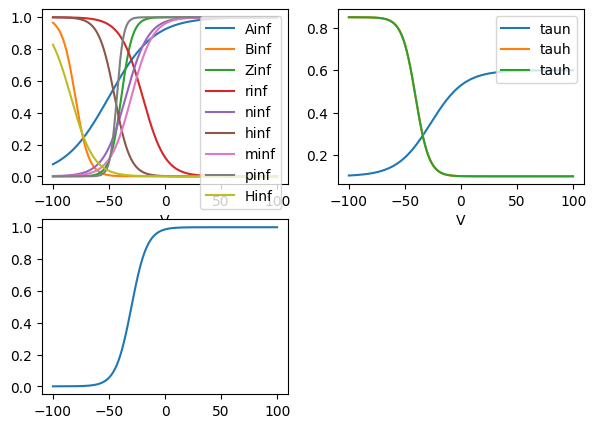

In [5]:
#gating varibles
tauq0 = 200
#Ca_acum=0.0001
aq=2
def minf(V):
    return 1.0/(1+np.exp(-(V--30)/9.5))
# def taum(V):
#     return 1/(0.1*(V+31)/(1-np.exp(-0.1*(V+31)))+4*np.exp(-(V+56)/18))
def hinf(V):
    return  1.0/(1+np.exp(-(V--45)/-7))
def tauh(V):
    return 0.1 + 0.75*(1.0/(1+np.exp(-(V--40.5)/-6)))
def ninf(V):
    return 1.0/(1+np.exp(-(V--35)/10))
def taun(V):
    return 0.1 + 0.5*(1.0/(1+np.exp(-(V--27)/15)))
def pinf(V):
    return 1.0/(1+np.exp(-(V--43)/3))
# def qinf(V):
#     return 1/(1+np.exp(-(V+35)/6.5))
# def tauq(V):
#     return tauq0/(np.exp(-(V+55)/30)+np.exp((V+55)/30))
# def mMinf(V):
#     return 1 / (1 + np.exp(-(V + 35) / 10))
# def tau_mM(V):
#     return 400 / (3.3*np.exp((V+35)/20)+ np.exp(-(V+35)/20))
def rinf(V):
    return 1/ (1 + np.exp(1*(V-(-20))/10))
# def taur(V):
#     return 1/(0.1*(V+40)/(1-np.exp(-(V+40)/10))*4*np.exp(-(V+65)/18))
def Zinf(V):
    return 1.0/(1+np.exp(-(V--39)/5))
def Ainf(V):
    return 1.0/(1+np.exp(-(V--50)/20))
def Binf(V):
    return 1.0/(1+np.exp(-(V--80)/-6))
def Hinf(V):
    return 1./(1. + np.exp((V + 84.)/10.2))
def tauH(V):
    return  1./(np.exp(-17.9 - 0.116*V ) + np.exp(-1.84 + 0.09*V )) + 0.1
def cinf(V):
    return  1.0/(1+np.exp(-(V--30)/7))
def dinf(Ca_acum):
    return 1.0/(1+6/Ca_acum)
def Qinf(Ca_acum):
    return 1.0/(1+(aq**4)/(Ca_acum**4))


vv = np.arange(-100,100 , 0.1)
fig = plt.figure(figsize=(7, 5))
gs = mpl.gridspec.GridSpec(2, 2, height_ratios=[1, 1])
ax = plt.subplot(gs[0])
plt.plot(vv,Ainf(vv),label = "Ainf")
plt.plot(vv,Binf(vv),label = "Binf")
plt.plot(vv,Zinf(vv),label = "Zinf")
plt.plot(vv,rinf(vv),label = "rinf")
plt.plot(vv,ninf(vv), label = "ninf")
plt.plot(vv,hinf(vv), label = "hinf")
plt.plot(vv,minf(vv), label = "minf")
#plt.plot(vv,qinf(vv), label = "qinf")
plt.plot(vv,pinf(vv), label = "pinf")
#plt.plot(vv,mMinf(vv), label = "mMinf")
plt.plot(vv,Hinf(vv), label = "Hinf")
plt.legend(loc='upper right')
plt.xlabel("V")

ax = plt.subplot(gs[1])
#plt.plot(vv,taur(vv), label = "taur")
plt.plot(vv,taun(vv), label = "taun")
plt.plot(vv,tauh(vv), label = "tauh")
#plt.plot(vv,taum(vv), label = "taum")
#plt.plot(vv,tauq(vv), label = "tauq")
#plt.plot(vv,tau_mM(vv), label = "taumM")
plt.plot(vv,tauh(vv), label = "tauh")


plt.legend(loc='upper right')
#plt.plot(vv,taup(vv))
#plt.plot(vv,tau_mM(vv))

plt.xlabel("V")

ax = plt.subplot(gs[2])
plt.plot(vv,cinf(vv))

In [6]:
from scipy.signal import find_peaks

In [7]:
pip install numpy matplotlib scipy


Note: you may need to restart the kernel to use updated packages.


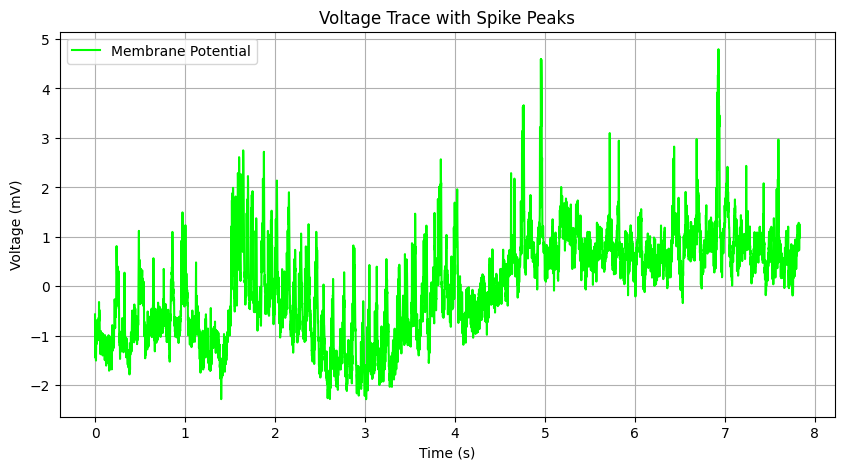

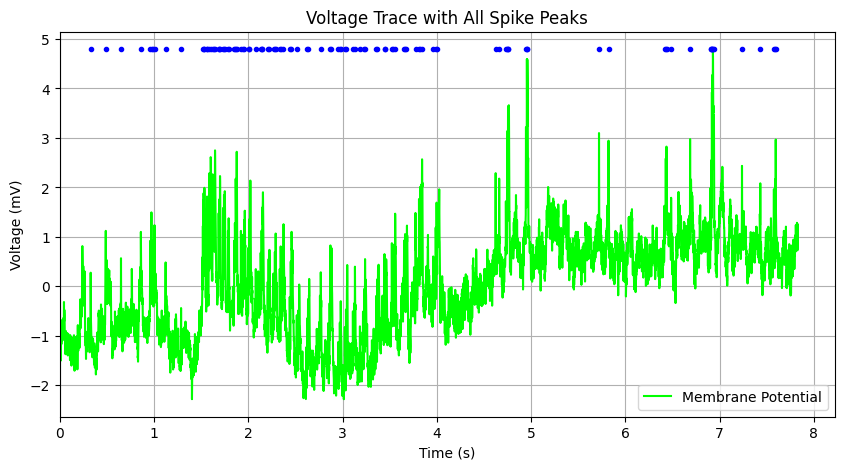

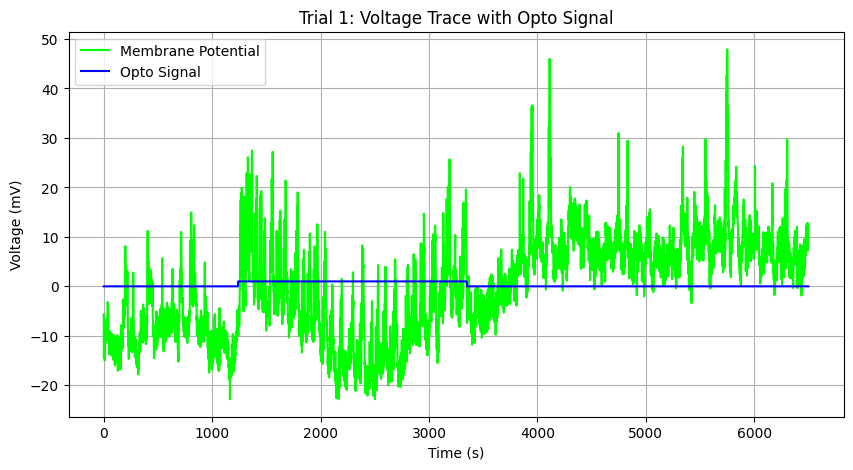

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat



# Path to the directory containing your .mat files
directory_path = r'C:\Users\Josh\OneDrive\Desktop\SBI\SomArchon_CA1_DC_opto-20240622T014030Z-001\SomArchon_CA1_DC_opto'

# Change directory to the folder containing the .mat files
os.chdir(directory_path)

# Listing all .mat files in the directory
files = [file for file in os.listdir() if file.endswith('.mat')]

# Load a specific session file, Python is 0-indexed

###################
session_index = 1
###################

data = loadmat(files[session_index], struct_as_record=False, squeeze_me=True)



# Accessing nested data safely
try:
    result = data['result']
    if hasattr(result.lfp, 'sampling_rate'):
        FS = result.lfp.sampling_rate
    else:
        FS = 828  # Default value if sampling_rate is not provided

    if hasattr(result.lfp, 'opto'):
        opto_signal = result.lfp.opto
    else:
        opto_signal = None
except KeyError:
    print("Key 'result' not found in the .mat file.")
    FS = 828  # Default if 'result' or 'lfp' key is missing
    opto_signal = None

# Extracting data for a given trial
trial = 1
try:
    Vm_trace = result.traces[result.trial_vec == trial] / result.tracesB[result.trial_vec == trial]
    Vm_trace1 = (Vm_trace - np.mean(Vm_trace))/np.std(Vm_trace)
    #Vm_trace1_min = Vm_trace1.min()
    #Vm_trace1_max = Vm_trace1.max()
    #Vm_trace1 = (Vm_trace1 - Vm_trace1_min) / (Vm_trace1_max - Vm_trace1_min)
except AttributeError:
    print("Necessary fields are missing in the 'result' structure.")
    Vm_trace = np.array([])  # Default empty array if fields are missing

# Plotting, check if Vm_trace is not empty
if Vm_trace.size > 0:
    plt.figure(figsize=(10, 5))
    t = np.arange(len(Vm_trace1)) / FS
    plt.plot(t, Vm_trace1, 'lime', label='Membrane Potential')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')
    plt.title('Voltage Trace with Spike Peaks')
    #plt.xlim(0,600)
    plt.legend()
    plt.grid(True)
    plt.show()


else:
    print("Vm_trace is empty, cannot plot.")



# # Accessing the spike indices
# trial_data = result.resultS[trial - 1]  # Use trial-1 because Python indexing is zero-based
# spike_indices = trial_data.spike_idx[50]  # Access the first spike_idx array

# # Convert spike indices to time by dividing by the sampling frequency
# spike_times = spike_indices / FS

# # Plot spike times over the voltage trace
# plt.figure(figsize=(10, 5))
# plt.plot(np.arange(len(Vm_trace)) / FS, Vm_trace, 'k', label='Membrane Potential')
# plt.plot(spike_times, np.ones_like(spike_times) * np.max(Vm_trace), '.r', label='Spike Times')
# #plt.ylim([0.9, 1.5])
# plt.xlabel('Time (s)')
# plt.ylabel('Voltage (mV)')
# plt.title('Voltage Trace with Spike Peaks')
# plt.legend()
# plt.grid(True)
# plt.show()


# Accessing spike indices for the specific trial
if hasattr(result.resultS[trial - 1], 'spike_idx'):
    spike_indices_list = result.resultS[trial - 1].spike_idx
else:
    print("No spike_idx found for the specified trial.")
    spike_indices_list = []

# Plotting the membrane potential
plt.figure(figsize=(10, 5))
t = np.arange(len(Vm_trace1)) / FS
plt.plot(t, Vm_trace1, 'lime', label='Membrane Potential')

# Plotting all spike times
for spike_indices in spike_indices_list:
    spike_times = spike_indices / FS
    plt.plot(spike_times, np.ones_like(spike_times) * np.max(Vm_trace1), '.b')  # Use '.r' to plot red dots

plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage Trace with All Spike Peaks')
plt.xlim(0,)
plt.legend()
plt.grid(True)
plt.show()
# Define the list of trial indices for which you want to plot the opto signal
selected_trials = [1]

# Iterate over each trial
for trial_index in selected_trials:
    # Check if the trial index is within the valid range
    if trial_index < 1 or trial_index > len(result.trial_vec):
        print(f"Trial index {trial_index} is out of range.")
        continue

    # Extracting data for the current trial
    try:
        Vm_trace = result.traces[result.trial_vec == trial_index] / result.tracesB[result.trial_vec == trial_index]
        Vm_trace1 = (Vm_trace - np.mean(Vm_trace)) / np.std(Vm_trace)
    except AttributeError:
        print("Necessary fields are missing in the 'result' structure.")
        continue  # Skip this trial if necessary fields are missing

    # Plotting, check if Vm_trace is not empty
    if Vm_trace.size > 0:
        plt.figure(figsize=(10, 5))
        t = np.arange(len(Vm_trace1))
        plt.plot(t, Vm_trace1*10, 'lime', label='Membrane Potential')

        # Check if opto signal data is available for this trial
        if opto_signal is not None and len(opto_signal) >= trial_index:
            opto_signal_trial = opto_signal[trial_index - 1]  # Extract opto signal for this trial
            t_opto = np.arange(len(opto_signal_trial))  # Assuming opto_signal_trial is sampled at FS
            plt.plot(t_opto, opto_signal_trial, 'blue', label='Opto Signal')

        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (mV)')
        plt.title(f'Trial {trial_index}: Voltage Trace with Opto Signal')
        plt.legend()
        plt.grid(True)
        # plt.xlim(1100,1200)
        # plt.ylim(-2,0)
        plt.show()
    else:
        print(f"Vm_trace for Trial {trial_index} is empty, cannot plot.")


In [9]:
import os

# Path to the directory containing your .mat files
directory_path = r'C:\Users\Josh\OneDrive\Desktop\SBI\SomArchon_CA1_DC_opto-20240622T014030Z-001\SomArchon_CA1_DC_opto'

# Change directory to the folder containing the .mat files
os.chdir(directory_path)

# Listing all .mat files in the directory
files = [file for file in os.listdir() if file.endswith('.mat')]

# Print the total number of sessions
print(f"Total number of sessions: {len(files)}")

# Optionally, print the list of session files
for i, file in enumerate(files):
    print(f"Session {i}: {file}")


Total number of sessions: 84
Session 0: 606705_rec1_fov1.mat
Session 1: 606705_rec2_fov1.mat
Session 2: 606705_rec7_fov1.mat
Session 3: 606705_rec7_fov2.mat
Session 4: 606705_rec7_fovb2.mat
Session 5: 606705_rec7_fovc2.mat
Session 6: 606716_rec10_fov1.mat
Session 7: 606716_rec10_fov2.mat
Session 8: 606716_rec10_fovb1.mat
Session 9: 606716_rec11_fov2.mat
Session 10: 606716_rec12_fov1.mat
Session 11: 606716_rec16_fov1.mat
Session 12: 606716_rec17_fov2.mat
Session 13: 606716_rec17_fov3.mat
Session 14: 606716_rec2_fov1.mat
Session 15: 606716_rec2_fov2.mat
Session 16: 606716_rec4_fov1.mat
Session 17: 606716_rec8_fov1.mat
Session 18: 606716_rec8_fov4.mat
Session 19: 606716_rec9_fov1.mat
Session 20: 606716_rec9_fov2.mat
Session 21: 611112_rec10_fov1.mat
Session 22: 611112_rec30_fov2.mat
Session 23: 611112_rec31_fov1.mat
Session 24: 611112_rec31_fov2.mat
Session 25: 611112_rec34_fov1.mat
Session 26: 611112_rec35_fov1.mat
Session 27: 611112_rec35_fov2.mat
Session 28: 611112_rec36_fov2.mat
Sessi

In [10]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.io import loadmat

# def explore_mat_structure(mat_obj, indent=0):
#     """ Helper function to print the structure of a mat file object """
#     spacing = ' ' * indent
#     if isinstance(mat_obj, dict):
#         for key, item in mat_obj.items():
#             print(f"{spacing}{key}: {type(item)}")
#             explore_mat_structure(item, indent + 2)
#     elif isinstance(mat_obj, np.ndarray) and mat_obj.dtype.names:
#         for name in mat_obj.dtype.names:
#             print(f"{spacing}{name}: {type(mat_obj[name])}")
#             explore_mat_structure(mat_obj[name], indent + 2)
#     elif hasattr(mat_obj, '__dict__'):
#         for key, item in mat_obj.__dict__.items():
#             print(f"{spacing}{key}: {type(item)}")
#             explore_mat_structure(item, indent + 2)

# # Path to the directory containing your .mat files
# directory_path = r'C:\Users\Josh\OneDrive\Desktop\SBI\SomArchon_CA1_DC_opto-20240622T014030Z-001\SomArchon_CA1_DC_opto'

# # Change directory to the folder containing the .mat files
# os.chdir(directory_path)

# # Listing all .mat files in the directory
# files = [file for file in os.listdir() if file.endswith('.mat')]

# # Load the first session file to explore its structure
# data = loadmat(files[0], struct_as_record=False, squeeze_me=True)
# result = data['result']

# # Explore the structure of 'result'
# print("Exploring structure of 'result':")
# explore_mat_structure(result)

# # Now that we have explored the structure, adjust the original code accordingly

# # Define the required length
# required_length = 5032

# # Iterate over each session file
# for session_index, file in enumerate(files):
#     # Load the session file
#     data = loadmat(file, struct_as_record=False, squeeze_me=True)

#     # Accessing nested data safely
#     try:
#         result = data['result']
#         # Adjust the access based on the actual structure
#         # This example assumes the correct structure is known
#         if hasattr(result, 'lfp') and hasattr(result.lfp, 'sampling_rate'):
#             FS = result.lfp.sampling_rate
#         else:
#             FS = 828  # Default value if sampling_rate is not provided

#         if hasattr(result, 'lfp') and hasattr(result.lfp, 'opto'):
#             opto_signal = result.lfp.opto
#         else:
#             opto_signal = None
#     except KeyError:
#         print(f"Key 'result' not found in the .mat file for session {session_index}.")
#         FS = 828  # Default if 'result' or 'lfp' key is missing
#         opto_signal = None

#     # Extracting data for a given trial
#     trial = 1
#     try:
#         traces = result.traces[result.trial_vec == trial]
#         tracesB = result.tracesB[result.trial_vec == trial]

#         # If traces is 2D, select a specific column (e.g., the first column)
#         if traces.ndim == 2:
#             traces = traces[:, 0]

#         Vm_trace = traces / tracesB
#         Vm_trace1 = (Vm_trace - np.mean(Vm_trace)) / np.std(Vm_trace)

#         # Ensure Vm_trace1 has the required length
#         if len(Vm_trace1) > required_length:
#             Vm_trace1 = Vm_trace1[:required_length]
#         else:
#             Vm_trace1 = np.pad(Vm_trace1, (0, required_length - len(Vm_trace1)), 'constant')
#     except AttributeError:
#         print(f"Necessary fields are missing in the 'result' structure for session {session_index}.")
#         Vm_trace1 = np.zeros(required_length)  # Default array if fields are missing

#     # Plotting Vm_trace1
#     if Vm_trace1.size > 0:
#         plt.figure(figsize=(10, 5))
#         t = np.arange(len(Vm_trace1)) / FS
#         plt.plot(t, Vm_trace1, 'lime', label='Membrane Potential')
#         plt.xlabel('Time (s)')
#         plt.ylabel('Voltage (mV)')
#         plt.title(f'Session {session_index}: Voltage Trace')
#         plt.legend()
#         plt.grid(True)
#         plt.show()
#     else:
#         print(f"Vm_trace is empty for session {session_index}, cannot plot.")

#     # Plotting Vm_trace1 with opto signal if available
#     if opto_signal is not None:
#         try:
#             opto_signal_trial = opto_signal[trial - 1]  # Extract opto signal for this trial
            
#             # Ensure opto_signal_trial has the required length
#             if len(opto_signal_trial) > required_length:
#                 opto_signal_trial = opto_signal_trial[:required_length]
#             else:
#                 opto_signal_trial = np.pad(opto_signal_trial, (0, required_length - len(opto_signal_trial)), 'constant')
                
#             t_opto = np.arange(len(opto_signal_trial)) / FS  # Assuming opto_signal_trial is sampled at FS
#             plt.figure(figsize=(10, 5))
#             plt.plot(t, Vm_trace1 * 10, 'lime', label='Membrane Potential')
#             plt.plot(t_opto, opto_signal_trial, 'blue', label='Opto Signal')
#             plt.xlabel('Time (s)')
#             plt.ylabel('Signal')
#             plt.title(f'Session {session_index}: Voltage Trace with Opto Signal')
#             plt.legend()
#             plt.grid(True)
#             plt.show()
#         except (IndexError, TypeError):
#             print(f"Opto signal data is not available for session {session_index}.")
#     else:
#         print(f"Opto signal is not available for session {session_index}.")


Fields in result.lfp:  ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames', 'label', 'opto', 'sampling_rate', 'time', 'trial']
LFP Trial Data:  [array([[ 615,  426,  115, ..., 2501, 2391, 2189],
        [ 615,  426,  115, ..., 2501, 2391, 2189],
        [ 615,  426,  115, ..., 2501, 2391, 2189]], dtype=int16)
 array([[-4374, -4403, -4335, ..., -4784, -5029, -5540],
        [-4374, -4403, -4335, ..., -4784, -5029, -5540],
        [-4374, -4403, -4335, ..., -4784, -5029, -5540]], dtype=int16)
 array([[-2780, -2119, -1626, ..., -2746, -3384, -3979],
        [-2780, -2119, -1626, ..., -2746, -3384, -3979],
        [-2780, -2119, -1626, ..., -2746, -3384, -3979]], dtype=in

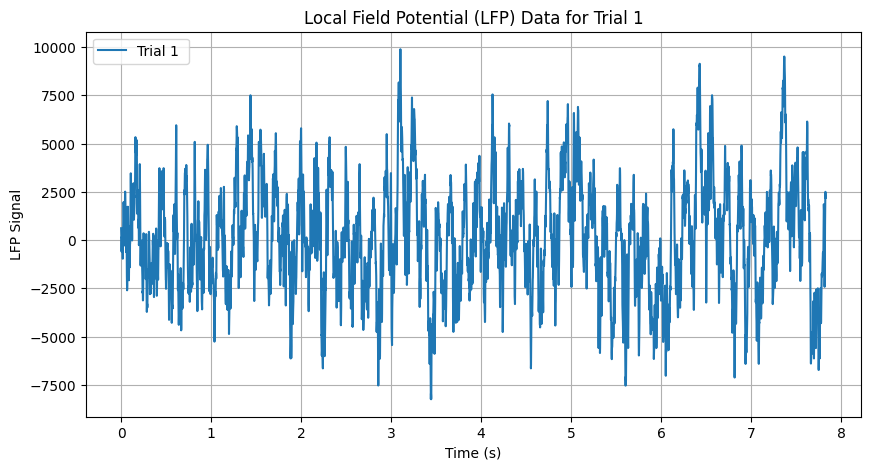

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


# Path to the directory containing your .mat files
directory_path = r'C:\Users\Josh\OneDrive\Desktop\SBI\SomArchon_CA1_DC_opto-20240622T014030Z-001\SomArchon_CA1_DC_opto'

# Change directory to the folder containing the .mat files
os.chdir(directory_path)

# Listing all .mat files in the directory
files = [file for file in os.listdir() if file.endswith('.mat')]

# Load a specific session file, Python is 0-indexed
session_index = 1 # adjust according to your specific file
data = loadmat(files[session_index], struct_as_record=False, squeeze_me=True)

# Define which trial to plot
trial_to_plot = 1 # Change this to the desired trial number (1-indexed)

# Accessing nested data safely
try:
    result = data['result']

    # Print available fields in result.lfp
    if hasattr(result, 'lfp'):
        print("Fields in result.lfp: ", dir(result.lfp))
    else:
        print("No 'lfp' field in result.")

    # Extracting LFP data
    lfp = result.lfp if hasattr(result, 'lfp') else None

    if lfp:
        FS = getattr(lfp, 'sampling_rate', 828)  # Default value if sampling_rate is not provided

        # Print LFP trial information
        if hasattr(lfp, 'trial'):
            print("LFP Trial Data: ", lfp.trial)
        else:
            print("No 'trial' data in LFP.")

        # Plotting the LFP data for the specified trial
        if hasattr(lfp, 'trial'):
            lfp_trial_data = lfp.trial
            if 0 < trial_to_plot <= len(lfp_trial_data):
                trial_data = lfp_trial_data[trial_to_plot - 1]  # Convert to 0-indexed
                plt.figure(figsize=(10, 5))
                t = np.arange(trial_data.shape[1]) / FS  # assuming each trial_data is an array with shape (channels, timepoints)
                plt.plot(t, trial_data[0], label=f'Trial {trial_to_plot} ')  # plot only the first channel

                plt.xlabel('Time (s)')
                plt.ylabel('LFP Signal')
                plt.title(f'Local Field Potential (LFP) Data for Trial {trial_to_plot}')
                plt.legend()
                plt.grid(True)
                plt.show()
            else:
                print(f"Trial {trial_to_plot} is out of range. There are only {len(lfp_trial_data)} trials available.")
        else:
            print("LFP data is empty, cannot plot.")

except KeyError:
    print("Key 'result' not found in the .mat file.")
    FS = 828  # Default if 'result' or 'lfp' key is missing


In [12]:
#np.set_printoptions(threshold=np.inf)
print(len(trial_data[0]))

6500


Fields in result.lfp:  ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames', 'label', 'opto', 'sampling_rate', 'time', 'trial']
LFP Trial Data:  [array([[ 615,  426,  115, ..., 2501, 2391, 2189],
        [ 615,  426,  115, ..., 2501, 2391, 2189],
        [ 615,  426,  115, ..., 2501, 2391, 2189]], dtype=int16)
 array([[-4374, -4403, -4335, ..., -4784, -5029, -5540],
        [-4374, -4403, -4335, ..., -4784, -5029, -5540],
        [-4374, -4403, -4335, ..., -4784, -5029, -5540]], dtype=int16)
 array([[-2780, -2119, -1626, ..., -2746, -3384, -3979],
        [-2780, -2119, -1626, ..., -2746, -3384, -3979],
        [-2780, -2119, -1626, ..., -2746, -3384, -3979]], dtype=in

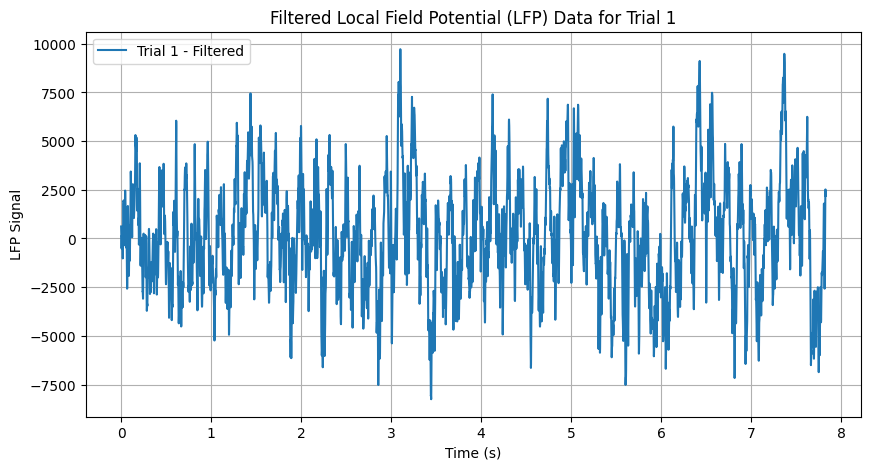

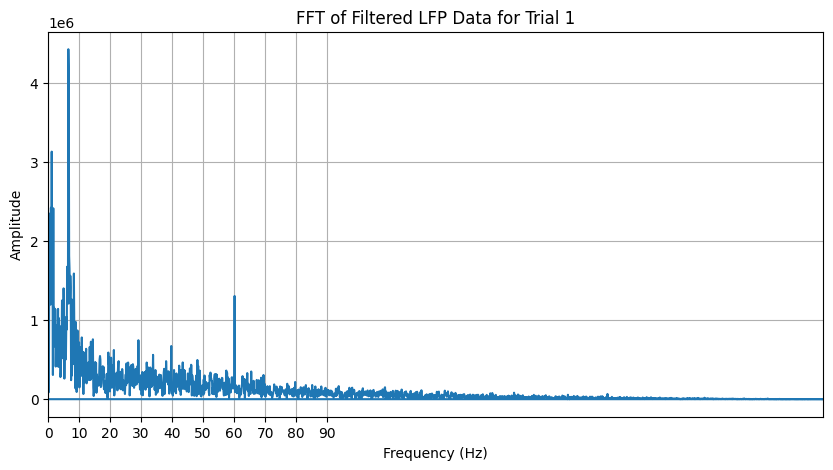

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq




# Path to the directory containing your .mat files
directory_path = r'C:\Users\Josh\OneDrive\Desktop\SBI\SomArchon_CA1_DC_opto-20240622T014030Z-001\SomArchon_CA1_DC_opto'

# Change directory to the folder containing the .mat files
os.chdir(directory_path)

# Listing all .mat files in the directory
files = [file for file in os.listdir() if file.endswith('.mat')]

# Load a specific session file, Python is 0-indexed
session_index = 1 # adjust according to your specific file
data = loadmat(files[session_index], struct_as_record=False, squeeze_me=True)

# Define which trial to plot
trial_to_plot = 1 # Change this to the desired trial number (1-indexed)

# Butterworth filter parameters
fs = 828  # Sampling frequency (Hz), adjust if necessary
cutoff = 200  # Cutoff frequency (Hz)
order = 4  # Filter order

# Function to apply Butterworth low-pass filter
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Accessing nested data safely
try:
    result = data['result']

    # Print available fields in result.lfp
    if hasattr(result, 'lfp'):
        print("Fields in result.lfp: ", dir(result.lfp))
    else:
        print("No 'lfp' field in result.")

    # Extracting LFP data
    lfp = result.lfp if hasattr(result, 'lfp') else None

    if lfp:
        FS = getattr(lfp, 'sampling_rate', 828)  # Default value if sampling_rate is not provided

        # Print LFP trial information
        if hasattr(lfp, 'trial'):
            print("LFP Trial Data: ", lfp.trial)
        else:
            print("No 'trial' data in LFP.")

        # Plotting the LFP data for the specified trial
        if hasattr(lfp, 'trial'):
            lfp_trial_data = lfp.trial
            if 0 < trial_to_plot <= len(lfp_trial_data):
                trial_data = lfp_trial_data[trial_to_plot - 1]  # Convert to 0-indexed

                # Apply the low-pass filter to each channel of the trial data
                filtered_trial_data = [butter_lowpass_filter(channel, cutoff, FS, order) for channel in trial_data]

                # Plotting the filtered voltage trace for the first channel
                plt.figure(figsize=(10, 5))
                t = np.arange(trial_data.shape[1]) / FS  # assuming each trial_data is an array with shape (channels, timepoints)
                plt.plot(t, filtered_trial_data[0], label=f'Trial {trial_to_plot} - Filtered')
                plt.xlabel('Time (s)')
                plt.ylabel('LFP Signal')
                plt.title(f'Filtered Local Field Potential (LFP) Data for Trial {trial_to_plot}')
                plt.legend()
                plt.grid(True)
                plt.show()

                # Compute and plot FFT
                N = len(filtered_trial_data[0])
                yf = fft(filtered_trial_data[0])
                xf = fftfreq(N, 1 / FS)

                plt.figure(figsize=(10, 5))
                plt.plot(xf, np.abs(yf))
                plt.xlim(0, 250)  # Limit x-axis to 0-100 Hz for better visualization
                plt.xticks(range(0,100,10))
                plt.xlabel('Frequency (Hz)')
                plt.ylabel('Amplitude')
                plt.title(f'FFT of Filtered LFP Data for Trial {trial_to_plot}')
                plt.grid(True)
                plt.show()

            else:
                print(f"Trial {trial_to_plot} is out of range. There are only {len(lfp_trial_data)} trials available.")
        else:
            print("LFP data is empty, cannot plot.")

except KeyError:
    print("Key 'result' not found in the .mat file.")
    FS = 828  # Default if 'result' or 'lfp' key is missing


In [14]:

# I_theta = np.array([0.7 * zap_input(i, 8, dt) for i in range(N)])
# I_gamma = np.array([zap_input(i, 60,  dt) for i in range(N)])
    
# I =  I_theta+I_gamma


In [15]:
# # Butterworth filter parameters
# fs = 828  # Sampling frequency (Hz), adjust if necessary
# cutoff = 60  # Cutoff frequency (Hz)
# order = 4  # Filter order

# # Function to apply Butterworth low-pass filter
# def butter_lowpass_filter(data, cutoff, fs, order=4):
#     nyquist = 0.5 * fs
#     normal_cutoff = cutoff / nyquist
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     y = filtfilt(b, a, data)
#     return y
# # Assuming Vm_trace1 is already defined
# x = run_HH_model(posterior_sample)
# mean_x = np.mean(x["data"])
# std_x = np.std(x["data"])
# stand_x = (x["data"] - mean_x) / std_x
# x_filtered = butter_lowpass_filter(stand_x, cutoff, fs, order)
# Vm_trace1_filtered = butter_lowpass_filter(Vm_trace1, cutoff, fs, order)
# # Plot the original and filtered signals for comparison
# t = np.arange(len(Vm_trace1)) / fs  # Create a time array based on the sampling frequency

# plt.figure(figsize=(10, 5))
# plt.plot(t, Vm_trace1_filtered, label='Original Signal')
# plt.plot(t, x_filtered, label='Filtered Signal', color='red', linewidth=2)
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('Original and Filtered Signal')
# plt.legend()
# plt.grid(True)

# plt.show()


[ 615.0665757   441.46121294  123.63056777 ... 2517.56375521 2433.15464137
 2188.03054628]


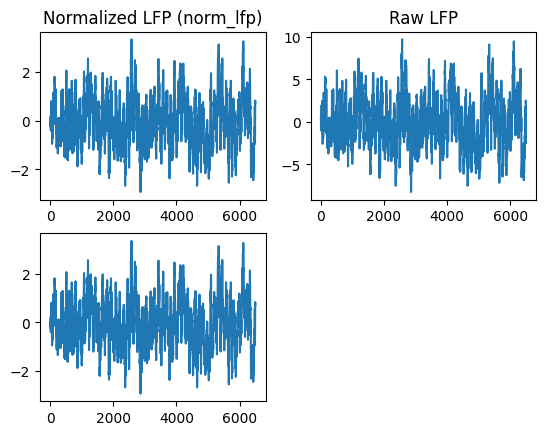

In [157]:
from sklearn import preprocessing


lfp = filtered_trial_data[1]

print(lfp)
plt.subplot(222)
plt.plot(lfp*.001)
plt.title("Raw LFP")


# norm_lfp = preprocessing.normalize(lfp.reshape(-1,1), norm='l2')
# print(norm_lfp)

mean_lfp = np.mean(lfp)
std_lfp = np.std(lfp)
norm_lfp = (lfp - mean_lfp) / std_lfp

plt.subplot(221)
plt.plot(norm_lfp)
plt.title("Normalized LFP (norm_lfp)")
#norm_lfp = lfp/1000
plt.subplot(223)
plt.plot(norm_lfp)

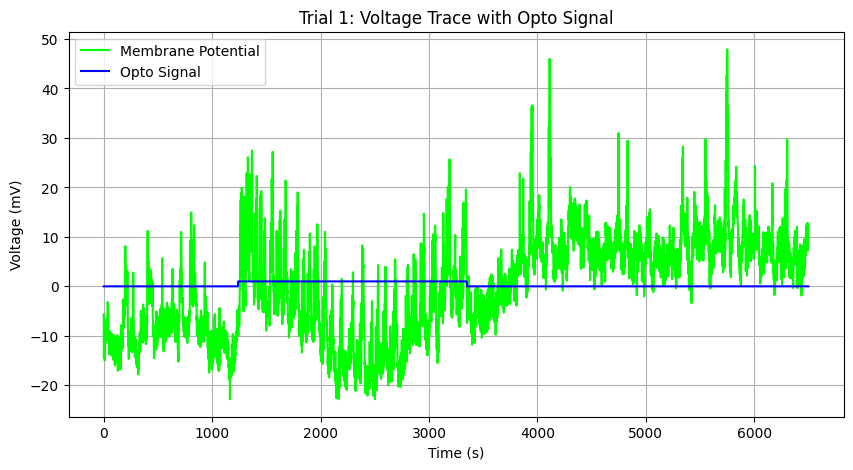

In [17]:
# Define the list of trial indices for which you want to plot the opto signal
selected_trials = [1]

# Iterate over each trial
for trial_index in selected_trials:
    # Check if the trial index is within the valid range
    if trial_index < 1 or trial_index > len(result.trial_vec):
        print(f"Trial index {trial_index} is out of range.")
        continue

    # Extracting data for the current trial
    try:
        Vm_trace = result.traces[result.trial_vec == trial_index] / result.tracesB[result.trial_vec == trial_index]
        Vm_trace1 = (Vm_trace - np.mean(Vm_trace)) / np.std(Vm_trace)
    except AttributeError:
        print("Necessary fields are missing in the 'result' structure.")
        continue  # Skip this trial if necessary fields are missing

    # Plotting, check if Vm_trace is not empty
    if Vm_trace.size > 0:
        plt.figure(figsize=(10, 5))
        t = np.arange(len(Vm_trace1))
        plt.plot(t, Vm_trace1*10, 'lime', label='Membrane Potential')

        # Check if opto signal data is available for this trial
        if opto_signal is not None and len(opto_signal) >= trial_index:
            opto_signal_trial = opto_signal[trial_index - 1]  # Extract opto signal for this trial
            t_opto = np.arange(len(opto_signal_trial))  # Assuming opto_signal_trial is sampled at FS
            plt.plot(t_opto, opto_signal_trial, 'blue', label='Opto Signal')

        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (mV)')
        plt.title(f'Trial {trial_index}: Voltage Trace with Opto Signal')
        plt.legend()
        plt.grid(True)
        # plt.xlim(1100,1200)
        # plt.ylim(-2,0)
        plt.show()
    else:
        print(f"Vm_trace for Trial {trial_index} is empty, cannot plot.")


In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


# Path to the directory containing your .mat files
directory_path = r'C:\Users\Josh\OneDrive\Desktop\SBI\SomArchon_CA1_DC_opto-20240622T014030Z-001\SomArchon_CA1_DC_opto'

# Change directory to the folder containing the .mat files
os.chdir(directory_path)

# Listing all .mat files in the directory
files = [file for file in os.listdir() if file.endswith('.mat')]

# Load a specific session file, Python is 0-indexed
session_index = 1  # adjust according to your specific file
data = loadmat(files[session_index], struct_as_record=False, squeeze_me=True)

# Define which trial to plot
trial_to_plot = 1  # Change this to the desired trial number (1-indexed)

# Accessing nested data safely
try:
    result = data['result']

    # Extracting LFP data
    lfp = result.lfp if hasattr(result, 'lfp') else None

    if lfp:
        FS = getattr(lfp, 'sampling_rate', 828)  # Default value if sampling_rate is not provided

        # Plotting the LFP data for the specified trial
        if hasattr(lfp, 'trial'):
            lfp_trial_data = lfp.trial
            if 0 < trial_to_plot <= len(lfp_trial_data):
                trial_data = lfp_trial_data[trial_to_plot - 1][0]  # Convert to 0-indexed and select the first channel
            else:
                print(f"Trial {trial_to_plot} is out of range. There are only {len(lfp_trial_data)} trials available.")
        else:
            print("LFP data is empty, cannot plot.")

except KeyError:
    print("Key 'result' not found in the .mat file.")
    FS = 828  # Default if 'result' or 'lfp' key is missing


In [98]:
import numpy as np
import scipy.stats as spstats
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def piecewise_constant_white_noise(t, Tdur, D):
    eta = np.random.randn(len(t))
    Ieta = np.zeros(len(t))
    for i in range(len(t)):
        Ieta[i] = eta[int(t[i] / Tdur)]
    return np.sqrt(D) * Ieta


def simulated_sinusoidal_input(amplitude, frequency, t):
    return amplitude * np.sin(2 * np.pi * frequency * t)

# Poisson Input
def poisson_input(r, dt):
    return 1 * (np.random.rand() < r * 10**-3 * dt)

# ZAP Input
def zap_input(i, Fzap, dt):
    return np.sin(2 * np.pi * Fzap * 10**-3 * i * dt + 3 * np.pi / 2)


def syn_current(duration=6500, dt=0.1, t_on=10, curr_level=0.1, pulse_duration=1,D=1, Tdur = .1 ):
    V0 = -70  # Initial voltage


# Generate Poisson and ZAP input

    duration = duration
    frequency = .08
    t_off = duration - t_on
    #t_off = 3350
    #t = np.arange(0, duration + dt, dt)
    t = np.arange(0, duration, dt)[:duration]
    noise = piecewise_constant_white_noise(t, Tdur, D)
    #Amp = 0.0
    N = len(t)
    A_soma = np.pi * ((70.0 * 1e-4) ** 2)

    poisson_rate = 1000  # Rate for Poisson input in Hz

    I_poisson = np.array([poisson_input(poisson_rate, dt) for _ in range(N)])
    
    I_theta = np.array([zap_input(i, 8, dt) for i in range(N)])
    I_gamma = np.array([zap_input(i, 60,  dt) for i in range(N)])
    
    #I = I_poisson + I_zap  # Combined input
    
    #I = I_poisson + I_zap
    # External current
    A_soma = np.pi * ((70.0 * 1e-4) ** 2)  # cm2
    #I = np.zeros(len(t))
    # omega = 2 * np.pi * frequency
    # #I = (curr_level * np.sin(omega * t))/A_soma
    #I[int(np.round(t_on / dt)) : int(np.round(t_off / dt))] = curr_level /A_soma  # muA/cm


    # #I = Vm_trace1
    # #I = np.full(len(t), curr_level / A_soma)  # Set current to a constant value across all t
    noise = piecewise_constant_white_noise(t, Tdur, D)
    I = norm_lfp 
    #I += noise
    #I = Vm_trace1
    #X = (curr_level*opto_signal_trial)/A_soma


    return I, t_on, t_off, dt, t, A_soma,I_gamma,I_theta



def HHsimulator(V0, params, dt, t, I,I_gamma,I_theta):

    Gna = params[0, 0]  # mS/cm2
    Gna.astype(float)
    Gk = params[0, 1]  # mS/cm2
    Gk.astype(float)
    Gl = params[0, 2]  # mS/cm2
    Gl.astype(float)
    # El = params[0, 3]  # mS/cm2
    # El.astype(float)
    Gnap = params[0, 3]  # mS/cm2
    Gnap.astype(float)
    # Ena = params[0, 5]  # mS/cm2
    # Ena.astype(float)
    # Ek = params[0, 6]  # mS/cm2
    # Ek.astype(float)
    Ga = params[0, 4]  # mS/cm2
    Ga.astype(float)
    Gca = params[0, 5]  # mS/cm2
    Gca.astype(float)
    Gc = params[0, 6]  # mS/cm2
    Gc.astype(float)
    Gsahp = params[0, 7]  # mS/cm2
    Gsahp.astype(float)
    # Eca = params[0, 11]  # mS/cm2
    # Eca.astype(float)
    Gh = params[0, 8]  # mS/cm2
    Gh.astype(float)
    # Eh = params[0, 13]  # mS/cm2
    # Eh.astype(float)
    Gm = params[0, 9]  # mS/cm2
    Gm.astype(float)
    Amp = params[0, 10]  # mS/cm2
    Amp.astype(float)
    # Amp2 = params[0, 11]  # mS/cm2
    # Amp2.astype(float)
    # Amp_theta = params[0, 11]  # mS/cm2
    # Amp_theta.astype(float)
    # Amp_gamma = params[0, 12]  # mS/cm2
    # Amp_gamma.astype(float)
    # # Gsd = params[0, 11]  # mS/cm2
    # # Gsd.astype(float)
    # # Gds = params[0, 12]  # mS/cm2
    # # Gds.astype(float)
    # # Gnd = params[0, 13]  # mS/cm2
    # # Gnd.astype(float)
    # # Ghn = params[0, 10]  # mS/cm2
    # # Ghn.astype(float)
    # # Gnapn = params[0, 11]  # mS/cm2
    # # Gnapn.astype(float)
    # ampT = params[0, 13]  # mS/cm2
    # ampT.astype(float)
    # ampG = params[0, 14]  # mS/cm2
    # ampG.astype(float)
    
    # p = params[0, 11]  # mS/cm2
    # p.astype(float)
    
    ampLFP = params[0, 11]  # mS/cm2
    ampLFP.astype(float)
    
    # El = params[0, 12]  # mS/cm2
    # El.astype(float)
    # Ena = params[0, 13]  # mS/cm2
    # Ena.astype(float)
    # Ek = params[0, 14]  # mS/cm2
    # Ek.astype(float)
    # Eca = params[0, 15]  # mS/cm2
    # Eca.astype(float)
    # Eh = params[0, 16]  # mS/cm2
    # Eh.astype(float)



    # fixed parameters

    # phih = 3.33;
    # phin = 3.33;
    # phiq = 1;

    phih = 1
    phin=1
    phiq=1

    Gc1 = 1;
    p = .15;

    Cm=1
    #Gl=0.05
    El=-70
    #Gna = 35
    #Gnap = 0.3
    Ena = 55
    Ek =-90
    #Ga=1.4
    #Gm =1
    #Gca =0
    #Gc=10
    #Gsahp=5
    Eca=120
    #Gh=2
    Eh=-32.9
    # Eh = 40
    #Gna = 35
    #Gk = 6




    #Gsd = Gc1/p;
    #Gds = Gc1/(1-p);

    Gsd =.2
    Gds=.2
    Gnd= 0.2
    tstep = float(dt)


    Iapp = 0.9
    Inoise = 0.0
    Iapp2 = 0.9

    sie = 0
    soe = 0
    sext = 0
    sextdend = 0
    gie = 0.08
    ein = -80
    goe = 5*0.08
    Iin = 0
    Iin2 = 0
    gext = 8 #ext
    tauext=10 #ext

    gextdend = 8 #ext
    tauextdend=10 #ext


    # if seed is not None:
    #     rng = np.random.RandomState(seed=seed)
    # else:
    #     rng = np.random.RandomState()


    D = 10
    Tdur = .1

    noise = piecewise_constant_white_noise(t, Tdur, D)
#numerical solution

    Vs = np.zeros(len(t))
    Vd = np.zeros(len(t))
    Vn = np.zeros(len(t))
    h = np.zeros(len(t))
    n = np.zeros(len(t))
    q = np.zeros(len(t))
    mM = np.zeros(len(t))
    hH = np.zeros(len(t))
    mM2 = np.zeros(len(t))
    hH2 = np.zeros(len(t))
    r = np.zeros(len(t))
    Z = np.zeros(len(t))
    B = np.zeros(len(t))
    H = np.zeros(len(t))
    C = np.zeros(len(t))
    Q = np.zeros(len(t))
    Ca_acum = np.zeros(len(t))
    Ca_acum[0] = 0.0001

    sext = np.zeros(len(t))
    sextdend = np.zeros(len(t))



    Vs[0] = El
    Vd[0] = El
    Vn[0] = El

    for j in range(len(t) - 1):
        
        Isyn = gie*sie*(Vs[j]-ein)
        iin = Isyn

        Isyn2 = gie*soe*(Vd[j]-ein)
        iin2 = Isyn2

        Iext = gext*sext[j]*(Vs[j]-ein)
        Iextdend = gextdend*sextdend[j]*(Vs[j]-ein)
        ###Complex Bursting Model
        k1vs = (-Gl*(Vs[j]-El)-Gna*minf(Vs[j])**3*h[j]*(Vs[j]-Ena)-Gnap*pinf(Vs[j])**3*(Vs[j]-Ena)
        -Gk*n[j]**4*(Vs[j]-Ek)-Ga*Ainf(Vs[j])**3*B[j]*(Vs[j]-Ek)-Gm*Z[j]*(Vs[j]-Ek)- Gca*r[j]**2*(Vs[j]-Eca)
        -Gc*dinf(Ca_acum[j])*C[j]*(Vs[j]-Ek)-Gsahp*Q[j]*(Vs[j]-Ek)-Gsd*(Vs[j]-Vd[j])+Amp*opto_signal_trial[j]+ampLFP*lfp[j])/Cm

        #k1vn = (-Gl*(Vn[j]-El)-Ghn*H[j]*(Vn[j]-Eh)-Gnapn*pinf(Vs[j])**3*(Vs[j]-Ena)- Gds*(Vn[j]-Vs[j]) - Gnd*(Vn[j]-Vd[j]) )/Cm;
        
        k1vd = (-Gl*(Vd[j]-El)-Gh*H[j]*(Vd[j]-Eh)-Gds*(Vd[j]-Vs[j])+Amp*opto_signal_trial[j]+ampLFP*lfp[j])/Cm;


        k1h = phih*(hinf(Vs[j])-h[j])/tauh(Vs[j]);
        k1n = phin*(ninf(Vs[j])-n[j])/taun(Vs[j]);
        k1r = (rinf(Vs[j])-r[j])/1;
        k1Z = (Zinf(Vs[j])-Z[j])/75;
        k1B = (Binf(Vs[j])-B[j])/15;
        k1H = (Hinf(Vd[j])-H[j])/tauH(Vd[j])
        k1C = (cinf(Vs[j])-C[j])/2
        kCa_acum = (-0.13*(Gca*r[j]**2*(Vs[j]-Eca)-Ca_acum[j]))/13
        k1Q = (Qinf(Ca_acum[j])-Q[j])/450
        ksext = -sext[j]/tauext
        ksextdend = -sextdend[j]/tauextdend


        avs = Vs[j]+k1vs*tstep;
        avd = Vd[j]+k1vd*tstep;
        #avn = Vn[j] + k1vn * tstep
        ah = h[j]+k1h*tstep;
        an = n[j]+k1n*tstep;
        ar = r[j]+k1r*tstep;
        aZ = Z[j]+k1Z*tstep;
        aB = B[j]+k1B*tstep;
        aH = H[j]+k1H*tstep;
        aC = C[j]+k1C*tstep;
        aQ = Q[j]+k1Q*tstep;
        aCa = Ca_acum[j]+kCa_acum*tstep

        asext= sext[j] + ksext*tstep
        asextdend= sextdend[j] + ksextdend*tstep

        ###Complex Bursting Model
        k2vs = (-Gl*(avs-El)-Gna*minf(avs)**3*ah*(avs-Ena)-Gnap*pinf(avs)**3*(avs-Ena)
        -Gk*an**4*(avs-Ek)-Gm*aZ*(avs-Ek)-Ga*Ainf(avs)**3*aB*(avs-Ek)- Gca*ar**2*(avs-Eca)
        -Gc*dinf(aCa)*aC*(avs-Ek)-Gsahp*aQ*(avs-Ek)-Gsd*(avs-avd)+Amp*opto_signal_trial[j]+ampLFP*lfp[j])/Cm

        #k2vn = (-Gl*(avd-El)-Ghn*aH*(avd-Eh)-Gnapn*pinf(avs)**3*(avs-Ena)-Gds*(avn-avs)-Gnd*(avn-avd))/Cm;

        k2vd = (-Gl*(avd-El)-Gh*aH*(avd-Eh)-Gds*(avd-avs)+Amp*opto_signal_trial[j]+ampLFP*lfp[j])/Cm;

        k2h = phih*(hinf(avs)-ah)/tauh(avs)
        k2n = phin*(ninf(avs)-an)/taun(avs)
        k2r = (rinf(avs)-ar)/1
        k2Z = (Zinf(avs)-aZ)/75;
        k2B = (Binf(avs)-aB)/15;
        k2H = (Hinf(avd)-aH)/tauH(avd)
        k2C = (cinf(avs)-aC)/2;
        kCa_acum2 = (-0.13*(Gca*ar**2*(avs-Eca)-aCa))/13
        k2Q = (Qinf(aCa)-aQ)/450;

        k2sext = -asext/tauext
        k2sextdend = -asextdend/tauextdend

        Vs[j+1] = Vs[j]+(k1vs+k2vs)*tstep/2
        Vd[j+1] = Vd[j]+(k1vd+k2vd)*tstep/2
        #Vn[j + 1] = Vn[j] + (k1vn + k2vn) * tstep / 2
        h[j+1] = h[j]+(k1h+k2h)*tstep/2
        n[j+1] = n[j]+(k1n+k2n)*tstep/2
        r[j+1] = r[j]+(k1r+k2r)*tstep/2
        Z[j+1] = Z[j]+(k1Z+k2Z)*tstep/2
        B[j+1] = B[j]+(k1B+k2B)*tstep/2
        H[j+1] = H[j]+(k1H+k2H)*tstep/2
        C[j+1] = C[j]+(k1C+k2C)*tstep/2
        Q[j+1] = Q[j]+(k1Q+k2Q)*tstep/2
        Ca_acum[j+1] = Ca_acum[j]+(kCa_acum+kCa_acum2)*tstep/2

        sext[j+1] = sext[j]+(ksext+k2sext)*tstep/2
        sextdend[j+1] = sextdend[j]+(ksextdend+k2sextdend)*tstep/2


    return np.array(Vs).reshape(-1, 1)


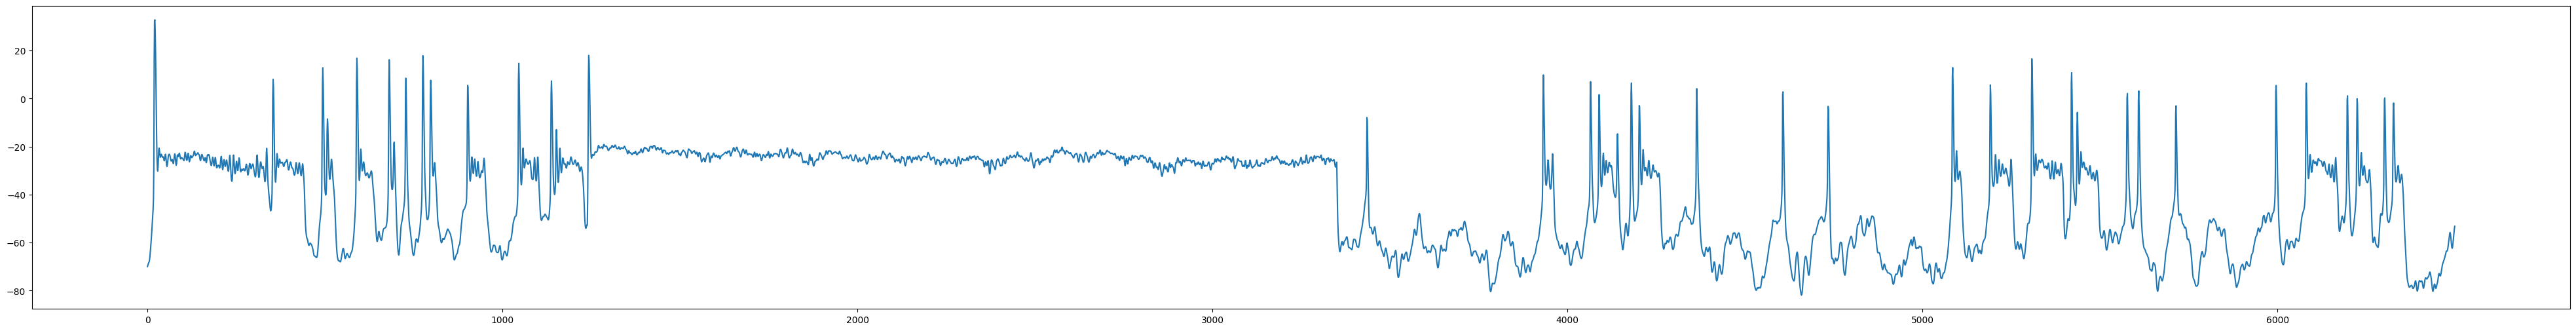

In [166]:
params = np.array([[35,
                    6,
                    0.05,
                    .92,
                    2.45,
                    .34,
                    .47,
                    1.52,
                    4.51,
                    2.49,
                    100,
                    .008
                    ]])



V0 = -70  # Initial voltage

I, t_on, t_off, dt, t, A_soma ,I_gamma,I_theta = syn_current()

Vs = HHsimulator(V0, params, dt, t, I,I_gamma,I_theta)
plt.figure(figsize=(50, 6))
plt.plot(Vs)

In [21]:

# params = np.array([[ 1.8280150e+02,  1.0306557e+01,  5.1868279e-02,  7.2894752e-01,
#    6.6805041e-01,  1.1860374e-01,  2.7775478e+00,  2.0384259e+00,
#    3.7630093e+00 , 2.0716224e+00 , 6.2988000e+00 , 3.3569124e-01,
#   -9.8887741e+01,  3.2336319e+01, -8.0804108e+01,  2.3810417e+02,
#   -5.3174000e+01]]) 

# params = np.array([[70,6,0.01,.03,.1,.1,.26,1,1,0.2]])# Example parameters
# # params = np.array([[55,
# #                     3,
# #                     0.1,
# #                     .04,
# #                     .1,
# #                     .1,
# #                     .26,
# #                     1,
# #                     1.51,
# #                     3,10,
# #                     .075,
# #                     0.075,
# #                     4,
# #                     10,
# #                     5]])# Example parameters
                    
# V0 = -70  # Initial voltage

# I, t_on, t_off, dt, t, A_soma,I_gamma,I_theta = syn_current()

# Vs = HHsimulator(V0, params, dt, t, I,I_gamma,I_theta)


# plt.figure(figsize = (30,10))
# plt.subplot(221)
# #plt.xlim(00,650)
# duration=6500
# dt=.1

# mean_x = np.mean(Vs)
# std_x = np.std(Vs)
# stand_x = (Vs - mean_x) / std_x

# t = np.arange(0, duration, dt)[:duration]
# #plt.xlim(1000,1500)
# plt.plot(t,Vs)


# # plt.ylim(-80,30)
# plt.subplot(224)
# plt.plot(t,I,color='yellow')


# plt.subplot(223)
# plt.plot(opto_signal_trial,color='green')


# mean_Vm = np.mean(Vm_trace1)
# std_Vm = np.std(Vm_trace1)
# stand_Vm = (Vm_trace1 - mean_Vm) / std_Vm

# plt.subplot(222)
# #plt.xlim(1000,2000)
# plt.plot(stand_Vm,color='red')

# plt.plot(stand_Vm)
# burst_starts_sim = np.array([[0.07590361445783132, 0.7819277108433735, 0.8783132530120482, 1.1506024096385543, 1.3228915662650602, 1.4759036144578312, 1.6096385542168674, 1.855421686746988, 2.292771084337349, 2.985542168674699, 3.136144578313253, 3.374698795180723, 3.516867469879518, 3.680722891566265, 3.8204819277108433]])
# burst_starts_sim = burst_starts_sim.flatten()*828
# plt.scatter(burst_starts_sim, np.zeros_like(burst_starts_sim)+3, color='orange', label='burst_starts_sim', marker='o')

# plt.ylim(-2,4)
# plt.xlim(1000,2500)


In [122]:
I, t_on, t_off, dt, t, A_soma,I_gamma,I_theta = syn_current()

In [23]:
import numpy as np
import scipy.stats as spstats
from scipy.fft import fft
from scipy.signal import find_peaks
from scipy.signal import hilbert

def calculate_summary_statistics(x):
    """Calculate summary statistics

    Parameters
    ----------
    x : dict
        output of the simulator containing key "data" for voltage trace

    Returns
    -------
    np.array
        summary statistics
    """
    # Assuming syn_current function and other required data are defined elsewhere
    I, t_on, t_off, dt, t, A_soma, I_gamma, I_theta = syn_current()

    print(f"Initial t size: {len(t)}, dt: {dt}")

    n_mom = 4
    n_summary = 32  # Increase to include additional statistics

    n_summary = np.minimum(n_summary, n_mom + 28)
    FS = 828  # Define the sampling frequency
    t = np.arange(len(x["data"])) 

    v = np.array(x["data"])

    # Spike detection using find_peaks
    peaks, _ = find_peaks(v, height=np.mean(v)+np.std(v))

    spike_times_stim = t[peaks]

    if len(spike_times_stim) > 1:
        ISI = np.diff(spike_times_stim)
    else:
        ISI = np.array([])  # No ISI possible with fewer than 2 spikes

    # Coefficient of Variation (CV) of ISI
    CV_ISI = np.std(ISI) / np.mean(ISI) if np.mean(ISI) > 0 else 0

    bursts = 0
    single_spikes = 0
    burst_starts = []
    burst_ends = []
    in_burst = False

    for i in range(len(spike_times_stim)):
        if i == 0 or (i > 0 and spike_times_stim[i] - spike_times_stim[i - 1] > 10):
            if in_burst:
                bursts += 1
                burst_ends.append(spike_times_stim[i - 1])
                in_burst = False
            single_spikes += 1
        else:
            if not in_burst:
                in_burst = True
                burst_starts.append(spike_times_stim[i - 1])
                single_spikes -= 1

    if in_burst:
        bursts += 1
        burst_ends.append(spike_times_stim[-1])

    # def extract_phase(signal, sampling_rate, frequency):
    #     scales = np.arange(1, 128)
    #     coefficients, _ = pywt.cwt(signal, scales, 'cmor', sampling_period=1/sampling_rate)
    #     index = np.argmin(np.abs(1 / (scales * pywt.central_frequency('cmor')) - frequency))
    #     phase = np.angle(coefficients[index])
    #     return phase

    # def compute_plv(phases):
    #     N = len(phases)
    #     plv = np.abs(np.sum(np.exp(1j * phases)) / N)
    #     return plv

    # def compute_plvu2(plv, N):
    #     plvu2 = (plv**2 * (N - 1)) / (N - 1)
    #     return plvu2

    # sampling_rate = 828  # Hz
    # theta_frequency = 8  # Hz
    # gamma_frequency = 60  # Hz
    # signal_theta = I_theta  # Example signal for theta
    # signal_gamma = I_gamma  # Example signal for gamma
    # spike_times = spike_times_stim  # Example spike times

    # # Validate spike times against signal length
    # spike_times = spike_times[spike_times < len(signal_theta)]

    # phases_theta = extract_phase(signal_theta, sampling_rate, theta_frequency)[spike_times]
    # phases_gamma = extract_phase(signal_gamma, sampling_rate, gamma_frequency)[spike_times]

    # plv_theta = compute_plv(phases_theta)
    # plv_gamma = compute_plv(phases_gamma)
    # print(f"PLV (Theta): {plv_theta}")
    # print(f"PLV (Gamma): {plv_gamma}")

    # N = len(spike_times)
    # if N >= 10:
    #     plvu2_theta = compute_plvu2(plv_theta, N)
    #     plvu2_gamma = compute_plvu2(plv_gamma, N)
    #     print(f"PLVu2 (Theta): {plvu2_theta}")
    #     print(f"PLVu2 (Gamma): {plvu2_gamma}")
    # else:
    #     plvu2_theta = 0
    #     plvu2_gamma = 0

    # shift_amount = int(8.2 / (1000 / sampling_rate))
    # shifted_spike_times = spike_times + shift_amount
    # shifted_spike_times = shifted_spike_times[shifted_spike_times < len(signal_theta)]
    # shifted_signal_theta = np.roll(signal_theta, shift_amount)
    # shifted_signal_gamma = np.roll(signal_gamma, shift_amount)

    # shifted_phases_theta = extract_phase(shifted_signal_theta, sampling_rate, theta_frequency)[shifted_spike_times]
    # shifted_phases_gamma = extract_phase(shifted_signal_gamma, sampling_rate, gamma_frequency)[shifted_spike_times]

    # shifted_plv_theta = compute_plv(shifted_phases_theta)
    # shifted_plv_gamma = compute_plv(shifted_phases_gamma)

    # if N >= 10:
    #     shifted_plvu2_theta = compute_plvu2(shifted_plv_theta, N)
    #     shifted_plvu2_gamma = compute_plvu2(shifted_plv_gamma, N)
    #     print(f"Shifted PLVu2 (Theta): {shifted_plvu2_theta}")
    #     print(f"Shifted PLVu2 (Gamma): {shifted_plvu2_gamma}")

    Burst_duration = np.subtract(burst_ends, burst_starts)
    burst_frequency = bursts / (t[-1] - t[0])

    firing_rate = spike_times_stim.shape[0] / (len(t) * dt)

    ISI_stats = [np.mean(ISI), np.std(ISI), np.median(ISI), spstats.skew(ISI), CV_ISI]
    burst_stats = [np.mean(bursts), np.mean(burst_starts), np.std(burst_starts), np.mean(burst_ends), np.std(burst_ends), np.mean(Burst_duration), np.std(Burst_duration), burst_frequency]
    voltage_stats = [np.max(x["data"]), np.min(x["data"]), np.max(np.diff(x["data"])), np.min(np.diff(x["data"])), spstats.kurtosis(x["data"])]
    #PLV_stats = [plvu2_theta, plvu2_gamma]
    fft_vals = np.abs(fft(x["data"]))
    power_spectrum = np.square(fft_vals)
    total_power = np.sum(power_spectrum)

    std_pw = np.power(
        np.std(x["data"]), np.linspace(3, n_mom, n_mom - 2)
    )
    std_pw = np.concatenate((np.ones(1), std_pw))
    moments = (spstats.moment(x["data"], np.linspace(2, n_mom, n_mom - 1)) / std_pw)
    
    sum_stats_vec = np.concatenate(
        (
            voltage_stats,
            ISI_stats, moments
        )
    )

    sum_stats_vec = sum_stats_vec[:n_summary]
    print(f"Array size: {len(sum_stats_vec)}")
    print(f"Final sum_stats_vec size before slicing (real): {len(sum_stats_vec)}, n_summary: {n_summary}")

    print(f"spike_times_stim: {spike_times_stim}")
    print(f"bursts: {bursts}")
    print(f"single_spikes: {single_spikes}")
    print(f"time: {t}")
    print(f"std: {np.std(v)}")

    return sum_stats_vec
def real_calculate_summary_statistics(x):
    """Calculate summary statistics

    Parameters
    ----------
    x : output of the simulator

    Returns
    -------
    np.array, summary statistics
    """
    I, t_on, t_off, dt, t, A_soma,I_gamma,I_theta = syn_current()

    print(f"Initial t size: {len(t)}, dt: {dt}")

    n_mom = 4
    n_summary = 32  # Increase to include additional statistics

    n_summary = np.minimum(n_summary, n_mom + 28)

    t = np.arange(len(Vm_trace1)) / FS


     # Spike detection using find_peaks
    # peaks, _ = find_peaks(Vm_trace1, height=np.mean(Vm_trace1)+np.std(Vm_trace1))

    # spike_indices_list = t[peaks]

    if len(spike_indices_list) > 1:
        ISI = np.diff(spike_indices_list)
    else:
        ISI = np.array([])  # No ISI possible with fewer than 2 spikes

    CV_ISI = np.std(ISI) / np.mean(ISI) if np.mean(ISI) > 0 else 0

    bursts = 0
    single_spikes = 0
    burst_starts = []
    burst_ends = []
    in_burst = False

    for i in range(len(spike_indices_list)):
        if i == 0 or (i > 0 and spike_indices_list[i] - spike_indices_list[i - 1] > 10):
            if in_burst:
                bursts += 1
                burst_ends.append(spike_indices_list[i - 1])
                in_burst = False
            single_spikes += 1
        else:
            if not in_burst:
                in_burst = True
                burst_starts.append(spike_indices_list[i - 1])
                single_spikes -= 1

    if in_burst:
        bursts += 1
        burst_ends.append(spike_indices_list[-1])

    # def extract_phase(signal, sampling_rate, frequency):
    #     scales = np.arange(1, 128)
    #     coefficients, _ = pywt.cwt(signal, scales, 'cmor', sampling_period=1/sampling_rate)
    #     index = np.argmin(np.abs(1 / (scales * pywt.central_frequency('cmor')) - frequency))
    #     phase = np.angle(coefficients[index])
    #     return phase

    # def compute_plv(phases):
    #     N = len(phases)
    #     plv = np.abs(np.sum(np.exp(1j * phases)) / N)
    #     return plv

    # def compute_plvu2(plv, N):
    #     plvu2 = (plv**2 * (N - 1)) / (N - 1)
    #     return plvu2

    # sampling_rate = 828  # Hz
    # theta_frequency = 8  # Hz
    # gamma_frequency = 60  # Hz
    # signal_theta = I_theta  # Example signal for theta
    # signal_gamma = I_gamma  # Example signal for gamma
    # spike_times = spike_indices_list  # Example spike times

    # # Validate spike times against signal length
    # spike_times = spike_times[spike_times < len(signal_theta)]

    # phases_theta = extract_phase(signal_theta, sampling_rate, theta_frequency)[spike_times]
    # phases_gamma = extract_phase(signal_gamma, sampling_rate, gamma_frequency)[spike_times]

    # plv_theta = compute_plv(phases_theta)
    # plv_gamma = compute_plv(phases_gamma)
    # print(f"PLV (Theta): {plv_theta}")
    # print(f"PLV (Gamma): {plv_gamma}")

    # N = len(spike_times)
    # if N >= 10:
    #     plvu2_theta = compute_plvu2(plv_theta, N)
    #     plvu2_gamma = compute_plvu2(plv_gamma, N)
    #     print(f"PLVu2 (Theta): {plvu2_theta}")
    #     print(f"PLVu2 (Gamma): {plvu2_gamma}")
    # else:
    #     plvu2_theta = 0
    #     plvu2_gamma = 0

    # shift_amount = int(8.2 / (1000 / sampling_rate))
    # shifted_spike_times = spike_times + shift_amount
    # shifted_spike_times = shifted_spike_times[shifted_spike_times < len(signal_theta)]
    # shifted_signal_theta = np.roll(signal_theta, shift_amount)
    # shifted_signal_gamma = np.roll(signal_gamma, shift_amount)

    # shifted_phases_theta = extract_phase(shifted_signal_theta, sampling_rate, theta_frequency)[shifted_spike_times]
    # shifted_phases_gamma = extract_phase(shifted_signal_gamma, sampling_rate, gamma_frequency)[shifted_spike_times]

    # shifted_plv_theta = compute_plv(shifted_phases_theta)
    # shifted_plv_gamma = compute_plv(shifted_phases_gamma)

    # if N >= 10:
    #     shifted_plvu2_theta = compute_plvu2(shifted_plv_theta, N)
    #     shifted_plvu2_gamma = compute_plvu2(shifted_plv_gamma, N)
    #     print(f"Shifted PLVu2 (Theta): {shifted_plvu2_theta}")
    #     print(f"Shifted PLVu2 (Gamma): {shifted_plvu2_gamma}")

    Burst_duration = np.subtract(burst_ends, burst_starts)
    burst_frequency = bursts / (t[-1] - t[0])

    firing_rate = spike_indices_list.shape[0] / (len(t) * dt)

    ISI_stats = [np.mean(ISI), np.std(ISI), np.median(ISI), spstats.skew(ISI), CV_ISI]
    burst_stats = [np.mean(bursts), np.mean(burst_starts), np.std(burst_starts), np.mean(burst_ends), np.std(burst_ends), np.mean(Burst_duration), np.std(Burst_duration), burst_frequency]
    voltage_stats = [np.max(Vm_trace1), np.min(Vm_trace1), np.max(np.diff(Vm_trace1)), np.min(np.diff(Vm_trace1)), spstats.kurtosis(Vm_trace1)]
    #PLV_stats = [plvu2_theta, plvu2_gamma]
    fft_vals = np.abs(fft(Vm_trace1))
    power_spectrum = np.square(fft_vals)
    total_power = np.sum(power_spectrum)

    std_pw = np.power(
        np.std(Vm_trace1), np.linspace(3, n_mom, n_mom - 2)
    )
    std_pw = np.concatenate((np.ones(1), std_pw))
    moments = (spstats.moment(Vm_trace1, np.linspace(2, n_mom, n_mom - 1)) / std_pw)
    
    sum_stats_vec = np.concatenate(
        (

            ISI_stats,
            
        )
    )

    sum_stats_vec = sum_stats_vec[:n_summary]
    print(f"Array size: {len(sum_stats_vec)}")
    print(f"Final sum_stats_vec size before slicing (real): {len(sum_stats_vec)}, n_summary: {n_summary}")

    print(f"spike_times_stim: {spike_indices_list}")
    print(f"bursts: {bursts}")
    print(f"single_spikes: {single_spikes}")
    print(f"time: {t}")

    return sum_stats_vec

In [123]:
def run_HH_model(params):

    params = np.asarray(params)
    t = np.arange(0, len(I), 1) * dt
    # initial voltage
    V0 = -70
    states = HHsimulator(V0, params.reshape(1, -1), dt, t,I,I_gamma,I_theta)
    return dict(data=states.reshape(-1), time=t, dt=dt, I=I.reshape(-1),I_gamma=I_gamma.reshape(-1),I_theta=I_theta.reshape(-1))

In [124]:
def simulation_wrapper(params):
    """
    Returns summary statistics from conductance values in `params`.

    Summarizes the output of the HH simulator and converts it to `torch.Tensor`.
    """
    obs = run_HH_model(params)

    summstats = torch.as_tensor(calculate_summary_statistics(obs))
    print(f"summstats size after simulation_wrapper: {summstats.size()}")



    return summstats

In [125]:
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch

from sbi import analysis as analysis

# sbi
from sbi import utils as utils
from sbi.inference import SNPE, simulate_for_sbi
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

In [27]:

prior_min = [0, 0, 0.01, 0.01, 1, 0.1, 0.1, 0.1, 0.01, 0.1]
prior_max =[120, 50, 5, 5, 15, 5,20 ,20, 5, 5]

prior = utils.torchutils.BoxUniform(low=torch.as_tensor(prior_min), high=torch.as_tensor(prior_max))


In [28]:
posterior = infer(simulation_wrapper, prior, method="SNPE", num_simulations=10, num_workers=4)

Initial t size: 6500, dt: 0.1
Array size: 13
Final sum_stats_vec size before slicing (real): 13, n_summary: 32
spike_times_stim: [   9   11   20   27   34   41   48   54   61   68   75   82   89   91
   97  104  112  119  127  134  136  142  150  157  165  172  174  180
  188  197  203  211  219  226  228  234  242  250  257  259  265  273
  281  289  297  305  313  321  329  337  345  353  361  369  377  379
  386  394  402  410  418  420  427  437  444  452  454  461  469  471
  478  480  487  495  497  504  514  521  529  539  546  554  557  564
  573  582  591  600  609  618  627  636  645  654  663  672  681  690
  699  708  717  726  728  736  745  754  759  763  771  773  780  786
  794  803  805  813  815  823  832  838  846  850  858  869  877  887
  897  907  917  927  933  943  953  963  969  981  989  991  999 1005
 1015 1025 1035 1045 1055 1065 1075 1085 1095 1106 1110 1119 1130 1139
 1149 1161 1170 1176 1182 1192 1202 1210 1220 1227 1237 1242 1251 1258
 1267 1276 1285 129

IndexError: index 10 is out of bounds for axis 1 with size 10

Initial t size: 6500, dt: 0.1
Array size: 13
Final sum_stats_vec size before slicing (real): 13, n_summary: 32
spike_times_stim: [   8   16   20   25   30   36   41   43   47   52   58   64   70   72
   77   83   85   90   96   98  103  110  118  120  128  136  138  146
  155  164  166  172  179  188  190  197  199  203  210  219  228  232
  235  242  252  261  271  280  283  290  292  300  309  311  319  329
  338  343  346  354  363  368  370  378  387  392  394  402  412  421
  423  431  433  441  443  451  453  461  467  471  479  489  499  509
  519  521  529  532  540  550  560  563  571  573  582  589  595  605
  615  625  640  649  659  665  675  685  691  693  702  712  718  728
  734  743  753  759  769  775  781  791  798  809  820  831  842  852
  858  860  869  877  886  892  898  904  914  920  930  934  942  948
  950  959  965  976  987  996 1002 1008 1015 1026 1036 1038 1048 1055
 1066 1077 1083 1093 1104 1111 1122 1128 1134 1141 1148 1159 1165 1172
 1181 1192 1204 121

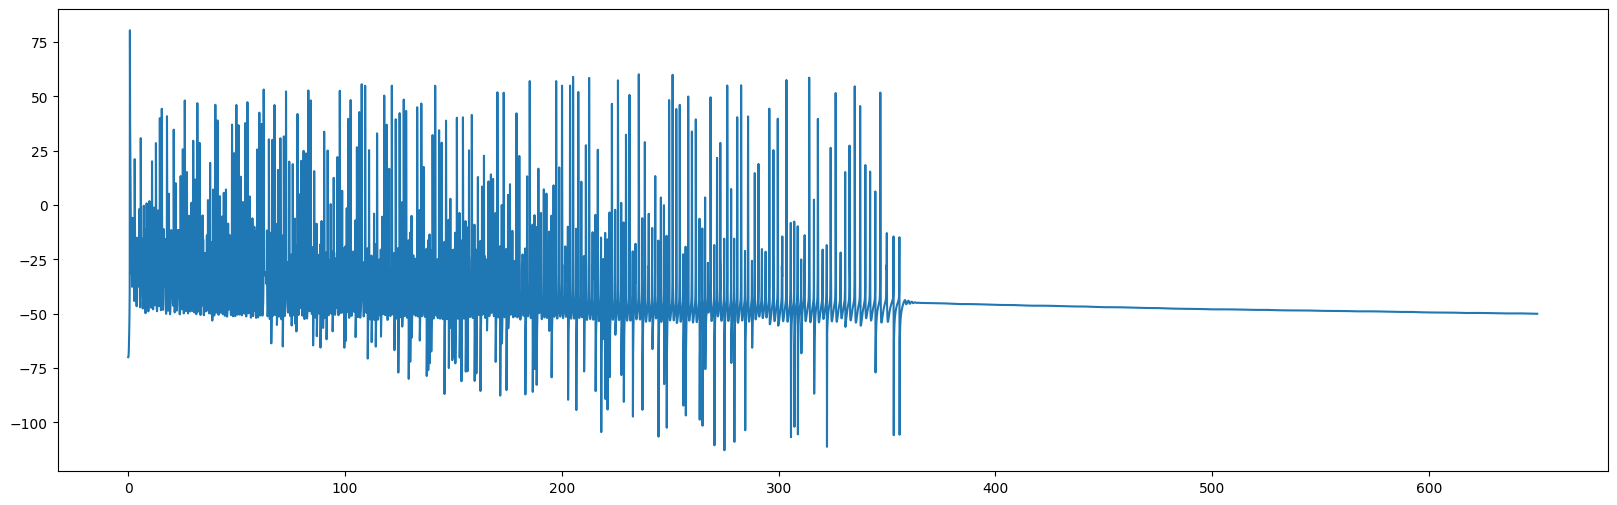

In [ ]:
# true parameters and respective labels
plt.figure(figsize=(20,6))

true_params = np.array([[[105.2269,  22.5812,   1.6067,   2.9075,   8.4686,   3.0987,  11.2690,
         13.4973,   2.5166,   2.8003,1,1,1,1,1,1]
                         ]])
labels_params = [r"$g_{GNa}$", r"$g_{GK}$"]
sim_observation_trace = run_HH_model(true_params)
observation_summary_statistics = calculate_summary_statistics(sim_observation_trace)
plt.plot(t,sim_observation_trace["data"])


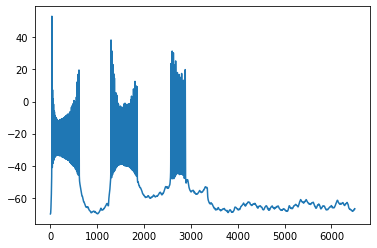

In [ ]:
plt.plot(Vs)

In [ ]:
print(len(spike_times_stim))

67


Initial t size: 6500, dt: 0.1
Array size: 13
Final sum_stats_vec size before slicing (real): 13, n_summary: 32
spike_times_stim: [   8   16   20   25   30   36   41   43   47   52   58   64   70   72
   77   83   85   90   96   98  103  110  118  120  128  136  138  146
  155  164  166  172  179  188  190  197  199  203  210  219  228  232
  235  242  252  261  271  280  283  290  292  300  309  311  319  329
  338  343  346  354  363  368  370  378  387  392  394  402  412  421
  423  431  433  441  443  451  453  461  467  471  479  489  499  509
  519  521  529  532  540  550  560  563  571  573  582  589  595  605
  615  625  640  649  659  665  675  685  691  693  702  712  718  728
  734  743  753  759  769  775  781  791  798  809  820  831  842  852
  858  860  869  877  886  892  898  904  914  920  930  934  942  948
  950  959  965  976  987  996 1002 1008 1015 1026 1036 1038 1048 1055
 1066 1077 1083 1093 1104 1111 1122 1128 1134 1141 1148 1159 1165 1172
 1181 1192 1204 121

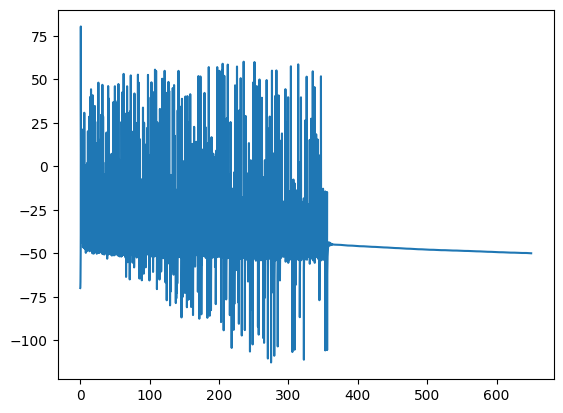

In [ ]:
sim_observation_trace = run_HH_model(true_params)
observation_summary_statistics = calculate_summary_statistics(sim_observation_trace)
plt.plot(t,sim_observation_trace["data"])


In [ ]:
observation_trace = Vm_trace1
observation_summary_statistics = real_calculate_summary_statistics(observation_trace)

Initial t size: 6500, dt: 0.1
Array size: 5
Final sum_stats_vec size before slicing (real): 5, n_summary: 32
spike_times_stim: [   5   11   29   42  211  308  354  365  416  436  528  566  614  668
  735  748  813  888  960  994 1022 1037 1081 1110 1130 1165 1237 1272
 1313 1362 1393 1421 1489 1521 1553 1584 1594 1616 1667 1728 1740 1774
 1816 1930 1941 1969 1996 2013 2071 2099 2192 2210 2233 2259 2304 2343
 2373 2379 2419 2474 2502 2535 2578 2594 2604 2659 2696 2731 2766 2803
 2846 2874 2890 2959 2993 3019 3050 3088 3092 3131 3187 3208 3284 3361
 3412 3706 3805 3828 3861 3965 3985 4147 4254 4326 4397 4561 4690 4755]
bursts: 5
single_spikes: 88
time: [0.00000000e+00 1.20772947e-03 2.41545894e-03 ... 6.03623188e+00
 6.03743961e+00 6.03864734e+00]


In [ ]:
import sbi
print(sbi.__version__)


0.22.0


In [ ]:
# from sbi.inference import SNPE, SNRE  # or other inference methods based on the version
# from sbi import inference  # Import inference module

# # Assuming you use SNPE
# inference_method = inference.SNPE(prior=prior, density_estimator=neural_posterior)


NameError: name 'neural_posterior' is not defined

In [ ]:
# def simulate_for_prior(prior, num_samples):
#     thetas = prior.sample((num_samples,))
#     xs = []
#     for theta in thetas:
#         obs = run_HH_model(theta.numpy())  # Run your simulation model
        
#         if isinstance(obs, dict):
#             # If `obs` is a dictionary, handle it according to your use case
#             # For example, if it has a key 'data' that contains the relevant tensor
#             if 'data' in obs:
#                 obs_tensor = torch.tensor(obs['data'], dtype=torch.float32)
#             else:
#                 raise ValueError("Dictionary `obs` does not contain the expected key 'data'.")
#         elif isinstance(obs, (list, np.ndarray)):
#             # If `obs` is a list or numpy array, convert it directly
#             obs_tensor = torch.tensor(obs, dtype=torch.float32)
#         elif isinstance(obs, torch.Tensor):
#             # If `obs` is already a tensor, use it directly
#             obs_tensor = obs
#         else:
#             raise TypeError("Unsupported type for `obs`.")

#         xs.append(obs_tensor)
    
#     # Ensure all tensors have the same shape
#     return torch.stack(xs)

# # Generate `x` by running simulations
# x = simulate_for_prior(prior, num_samples)


NameError: name 'num_samples' is not defined

In [ ]:
# import torch
# import torch.nn as nn
# from sbi.neural_nets.embedding_nets import PermutationInvariantEmbedding
# from sbi.utils import posterior_nn
# from sbi.inference import SNPE

# # Define a simple trial network
# class SimpleNet(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(SimpleNet, self).__init__()
#         self.fc = nn.Linear(input_dim, output_dim)
        
#     def forward(self, x):
#         return self.fc(x)

# # Define the embedding network
# class CustomEmbeddingNet(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(CustomEmbeddingNet, self).__init__()
#         self.fc = nn.Linear(input_dim, output_dim)
        
#     def forward(self, x):
#         # Process x and potentially theta here if needed
#         return self.fc(x)

# # Example dimensions
# input_dim_x = 6500  # Dimension of x
# output_dim = 128  # Dimension for embedding output

# # Instantiate trial and embedding networks
# trial_net = SimpleNet(input_dim_x, output_dim)
# embedding_net = CustomEmbeddingNet(input_dim_x, output_dim)

# # Instantiate the conditional neural density estimator
# neural_posterior = posterior_nn(model="maf", embedding_net=embedding_net)

# # Setup SNPE

# prior_min = [0, 0, 0.01, 0.01, 1, 0.1, 0.1, 0.1, 0.01, 0.1,0,0,0]
# prior_max =[120, 50, 5, 5, 15, 5,20 ,20, 5, 5,10,10,10]

# prior = utils.torchutils.BoxUniform(low=torch.as_tensor(prior_min), high=torch.as_tensor(prior_max))

# inferer = SNPE(prior=prior, density_estimator=neural_posterior)

# # Generate theta and x (ensure they are tensors and in the correct shape)
# theta = torch.tensor(theta, dtype=torch.float32)  # Shape: [100, 10]
# x = torch.tensor(x, dtype=torch.float32)  # Shape: [100, 6500]

# # Train the density estimator
# density_estimator = inferer.append_simulations(theta, x).train()

# # Build the posterior
# posterior = inferer.build_posterior(density_estimator)


In [ ]:
# # Generate theta and x
# num_simulations = 100
# theta = prior.sample((num_simulations,))
# x = simulate_for_prior(prior, num_simulations)

In [259]:
num_simulations = 10000

prior_min = [50, 10, 0.01, 0.01, 1, 0.1, 0.1, 0.1, 0.01, 0.1,0,0]
prior_max =[120, 36, 1, 1, 10, 1,20 ,20, 10, 10,10,.01]
prior = utils.torchutils.BoxUniform(low=torch.as_tensor(prior_min), high=torch.as_tensor(prior_max))
def simulate_for_prior(prior, num_simulations):
    thetas = prior.sample((num_simulations,))
    xs = []
    for theta in thetas:
        obs = run_HH_model(theta.numpy())  # Run your simulation model
        
        if isinstance(obs, dict):
            # If `obs` is a dictionary, handle it according to your use case
            # For example, if it has a key 'data' that contains the relevant tensor
            if 'data' in obs:
                obs_tensor = torch.tensor(obs['data'], dtype=torch.float32)
            else:
                raise ValueError("Dictionary `obs` does not contain the expected key 'data'.")
        elif isinstance(obs, (list, np.ndarray)):
            # If `obs` is a list or numpy array, convert it directly
            obs_tensor = torch.tensor(obs, dtype=torch.float32)
        elif isinstance(obs, torch.Tensor):
            # If `obs` is already a tensor, use it directly
            obs_tensor = obs
        else:
            raise TypeError("Unsupported type for `obs`.")

        xs.append(obs_tensor)
    
    # Ensure all tensors have the same shape
    return thetas,torch.stack(xs)

# Generate `x` by running simulations
theta,x = simulate_for_prior(prior, num_simulations)


In [ ]:
print(len(theta))
print(len(x))

5
5


In [260]:
import torch
import torch.nn as nn
import torch
import torch.nn as nn
from sbi.neural_nets.embedding_nets import PermutationInvariantEmbedding
from sbi.utils import posterior_nn
from sbi.inference import SNPE

class CustomFCEmbedding(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2, dropout=0.1):
        super(CustomFCEmbedding, self).__init__()
        
        layers = []
        in_dim = input_dim
        
        # Create hidden layers
        for _ in range(num_layers):
            layers.append(nn.Linear(in_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            in_dim = hidden_dim
        
        # Create output layer
        layers.append(nn.Linear(hidden_dim, output_dim))
        
        # Combine all layers into a Sequential module
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.network(x)

# Example dimensions
input_dim = 6500  # Dimension of x
hidden_dim = 128  # Hidden layer dimension
output_dim = 50  # Dimension for embedding output
num_layers = 2  # Number of hidden layers
dropout = 0.1    # Dropout rate

# Instantiate the custom embedding network
embedding_net = CustomFCEmbedding(
    input_dim=input_dim,
    hidden_dim=hidden_dim,
    output_dim=output_dim,
    num_layers=num_layers,
    dropout=dropout
)

#embedding_net = FCEmbedding(6500)
# Instantiate the conditional neural density estimator
neural_posterior = posterior_nn(model="maf", embedding_net=embedding_net)

# Setup SNPE


prior_min = [50, 10, 0.01, 0.01, 1, 0.1, 0.1, 0.1, 0.01, 0.1,0,0]
prior_max =[120, 36, 1, 1, 10, 1,20 ,20, 10, 10,10,.01]

prior = utils.torchutils.BoxUniform(low=torch.as_tensor(prior_min), high=torch.as_tensor(prior_max))

inferer = SNPE(prior=prior, density_estimator=neural_posterior)

# Generate theta and x (ensure they are tensors and in the correct shape)
theta = torch.tensor(theta, dtype=torch.float32)  # Shape: [100, 10]
x = torch.tensor(x, dtype=torch.float32)  # Shape: [100, 6500]

# Train the density estimator
density_estimator = inferer.append_simulations(theta, x).train()

# Build the posterior
posterior = inferer.build_posterior(density_estimator)



C:\Users\Josh\AppData\Local\Temp\ipykernel_4664\2607552024.py:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta = torch.tensor(theta, dtype=torch.float32)  # Shape: [100, 10]
C:\Users\Josh\AppData\Local\Temp\ipykernel_4664\2607552024.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)  # Shape: [100, 6500]


 Neural network successfully converged after 149 epochs.

In [ ]:
print(theta_i)

[57.554226  15.742281   2.2176266  0.4457293 10.407738   1.3672019
 15.60464   13.731839   4.8055534  1.5430559  4.783607   7.385257
  2.2628891]


In [ ]:
import matplotlib.pyplot as plt

# Define the range of sample indices you want to plot
start_index = 0
end_index = 99

# Loop through the specified range of indices
for sample_index in range(start_index, end_index + 1):
    sample_i = x[sample_index].numpy()  # Convert to NumPy array for plotting
    theta_i = theta[sample_index].numpy()
    
    plt.figure(figsize=(50, 6))  # Adjust the figure size as needed
    plt.plot(sample_i)
    plt.title(f'Sample {sample_index} from Tensor x')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    print(f'Sample {sample_index}: {sample_i}')
    # plt.xlim(0, 1000)  # Uncomment and adjust if you want to set x-axis limits
 
    plt.show()


[-70.       -69.53911  -69.05804  ... -65.610756 -65.01911  -64.673775]


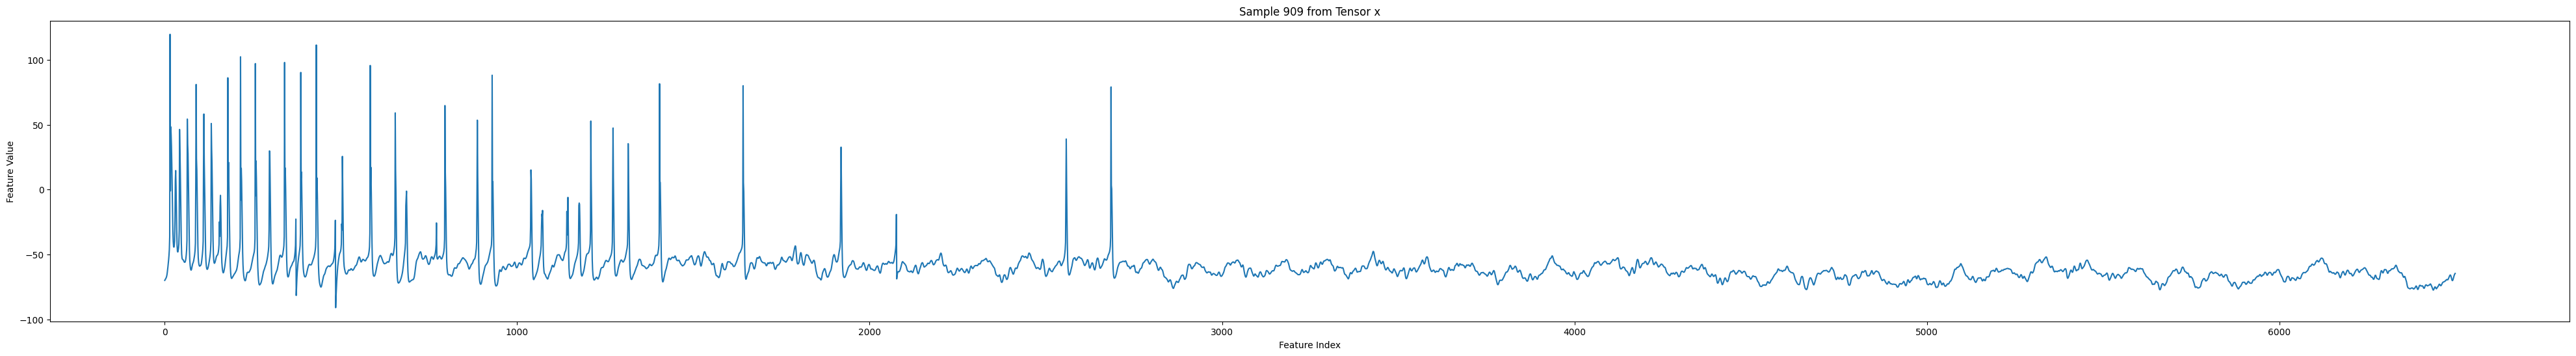

In [288]:

sample_index = 909 # Index of the sample you want to plot
sample_i = x[sample_index].numpy()  # Convert to NumPy array for plotting
theta_i = theta[sample_index].numpy()
plt.figure(figsize=(50, 6))
plt.plot(sample_i)
plt.title(f'Sample {sample_index} from Tensor x')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
print(sample_i)
#plt.xlim(0,1000)
plt.show()

In [ ]:
print(len(sample_i))

6500


Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

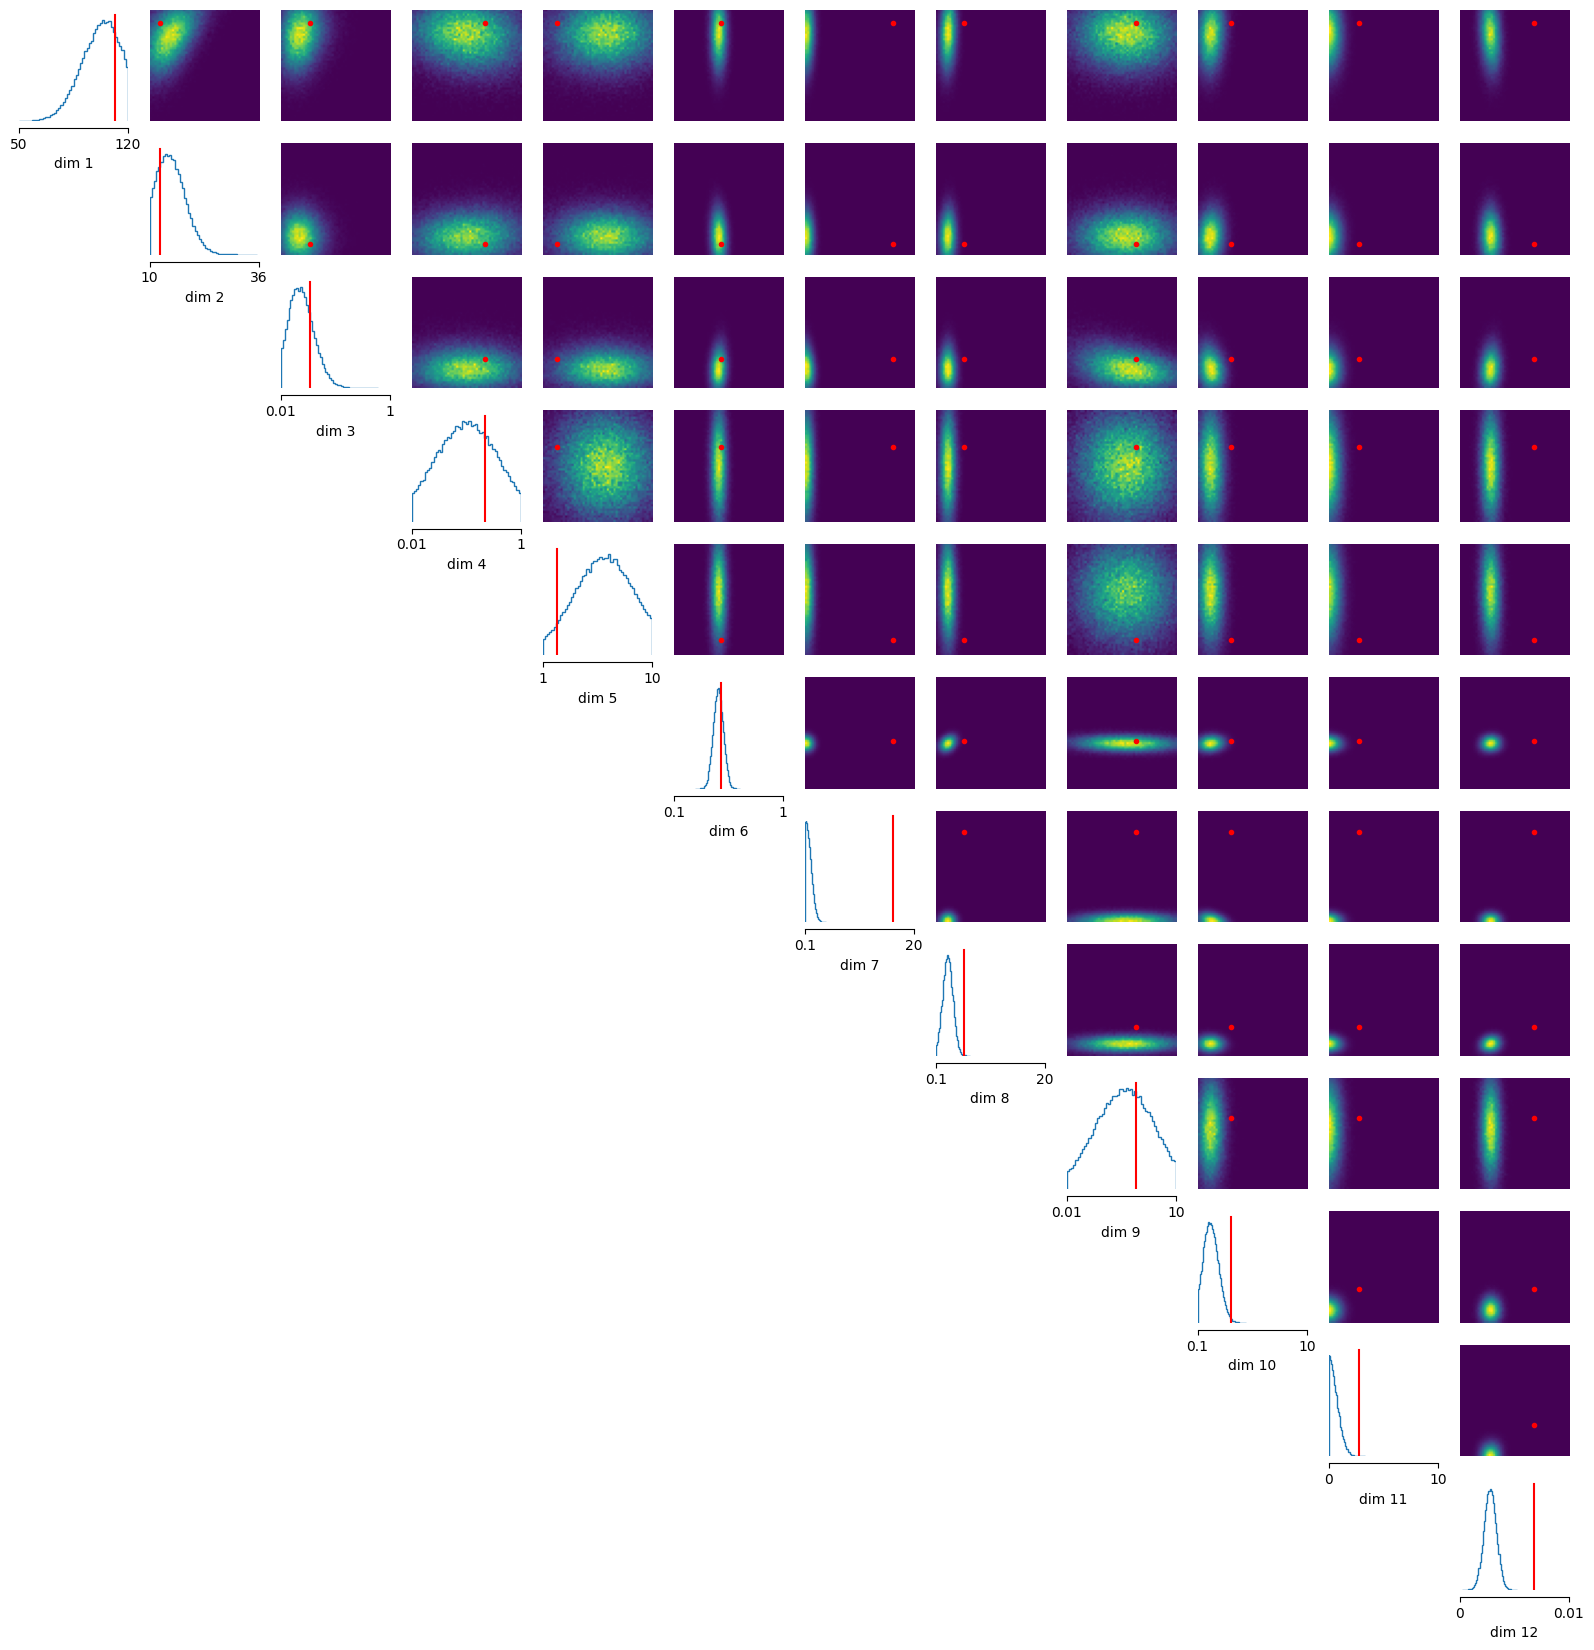

In [289]:
sample_i_tensor = torch.tensor(sample_i, dtype=torch.float32).unsqueeze(0)
samples = posterior.sample((100000,), x=Vm_trace1*10)


prior_min = [50, 10, 0.01, 0.01, 1, 0.1, 0.1, 0.1, 0.01, 0.1,0,0]
prior_max =[120, 36, 1, 1, 10, 1,20 ,20, 10, 10,10,.01]

limits = list(zip(prior_min, prior_max))
ticks = limits

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    ticks=ticks,
    figsize=(20, 20),
    points = theta_i,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

tensor([[7.3165e+01, 1.6560e+01, 3.0126e-01, 4.5956e-01, 6.2331e+00, 4.5026e-01,
         1.3507e-01, 1.5129e+00, 1.3518e+00, 9.5357e-01, 2.5821e-01, 4.0891e-03]])


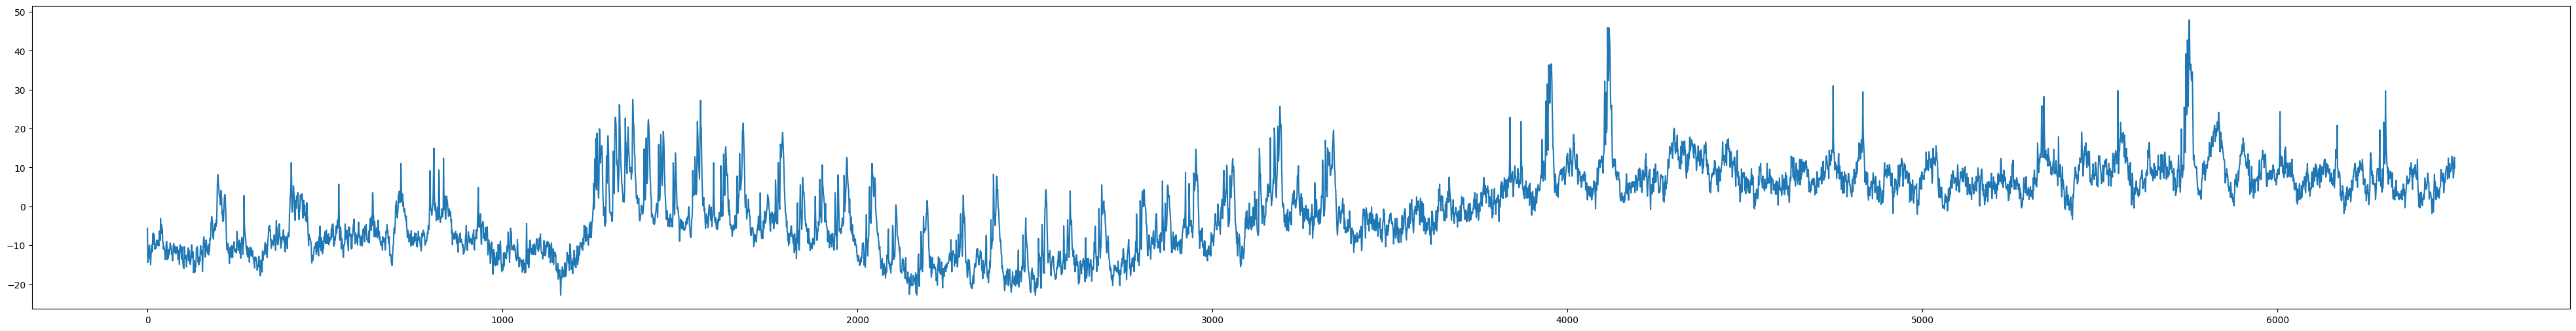

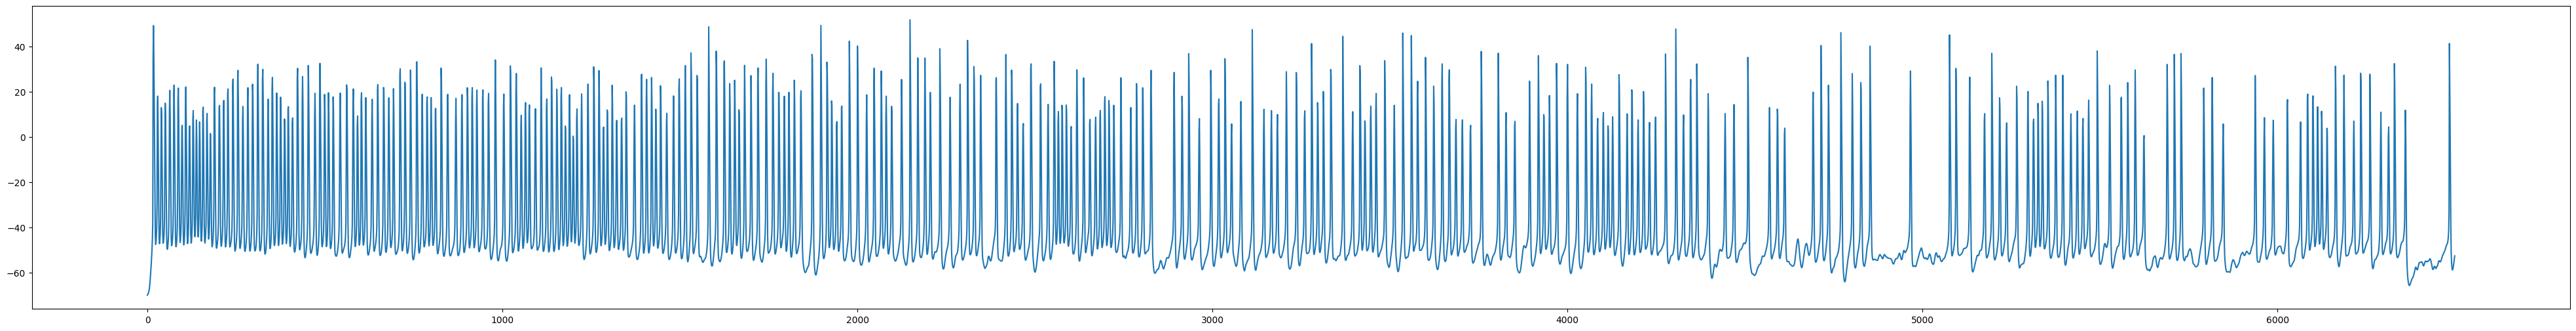

In [297]:
#posterior_sample = torch.mean(samples,0)
posterior_sample = posterior.sample((1,), x=Vm_trace1*10)

print(posterior_sample)
sim_observation_trace = run_HH_model(posterior_sample)
observation_data = sim_observation_trace["data"]
#observation_data = Vm_trace1
plt.figure(figsize=(50, 6))
#plt.xlim(0,1000)
plt.plot(Vm_trace1*10)

plt.show()
plt.figure(figsize=(50, 6))

plt.plot(observation_data)



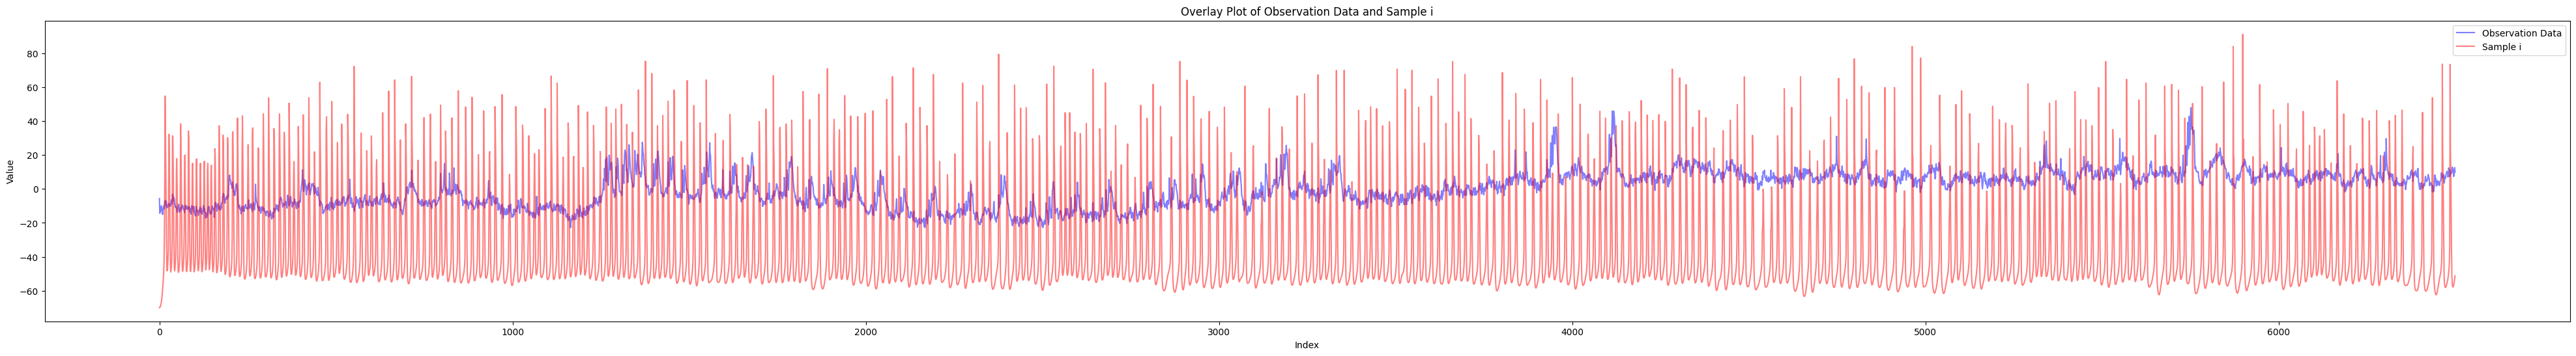

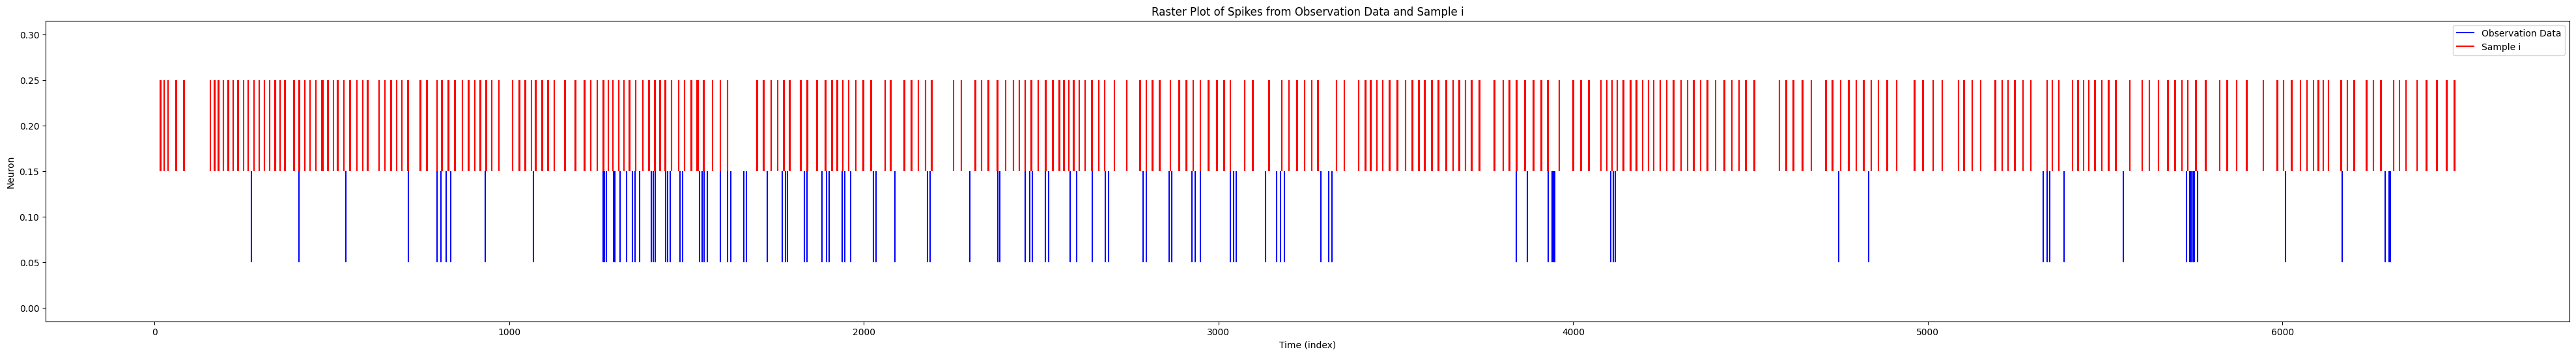

In [292]:
plt.figure(figsize=(50, 6))

# Plot observation data with a specific color and alpha (transparency)
plt.plot(Vm_trace1*10, label='Observation Data', color='blue', alpha=0.5)

# Plot sample_i data with a different color and alpha (transparency)
plt.plot(observation_data, label='Sample i', color='red', alpha=0.5)

# Add legend to differentiate the plots
plt.legend()

# Add labels and title for clarity
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Overlay Plot of Observation Data and Sample i')
# plt.ylim(-2,2)
# plt.xlim(0,1000)
# Show the plot

plt.show()

# Threshold to detect spikes (adjust the threshold value as needed)
threshold = 20

# Find spike times for observation data
spikes_obs = np.where(observation_data > threshold)

# Find spike times for sample_i data
spikes_sample_i = np.where(sample_i > threshold)
plt.figure(figsize=(50, 6))
# Plot raster plot
plt.eventplot(spike_indices_list, lineoffsets=.1, linelengths=0.1, colors='blue', label='Observation Data')
plt.eventplot(spikes_obs, lineoffsets=.2, linelengths=0.1, colors='red', label='Sample i')

# Add legend to differentiate the plots
plt.legend()

# Add labels and title for clarity
plt.xlabel('Time (index)')
plt.ylabel('Neuron')
plt.title('Raster Plot of Spikes from Observation Data and Sample i')

# Show the plot
plt.show()


In [ ]:
plt.figure(figsize=(25, 1))
v = np.array(observation_data)
peaks,_ = find_peaks(v, height=-20)
spike_times_stim = t[peaks]
# plt.scatter(spike_times_stim, np.zeros_like(spike_times_stim)+4.,color='blue', label = 'SS', marker = 'o', alpha=0.5)
# plt.scatter(spike_indices_list, np.zeros_like(spike_indices_list)+4,color='red', label = 'SS', marker = 'o', alpha=0.5)
# #plt.xlim(1000,2000)
plt.eventplot([spike_times_stim, spike_indices_list], colors=['blue', 'red'], linelengths=0.8)

# Additional plot customization
plt.xlabel('Time')
plt.ylabel('Spike Event')
plt.title('Plot of Spike Timings')
#plt.xlim(1000,6000)
plt.grid(True)

IndexError: index 5019 is out of bounds for axis 0 with size 5001

<Figure size 2500x100 with 0 Axes>

In [ ]:
x_observed = sample_i
samples = posterior.set_default_x(x_observed).sample((100000,))


Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

In [ ]:
samples = posterior.sample((100000,))

ValueError: Context `x` needed when a default has not been set.If you'd like to have a default, use the `.set_default_x()` method.

In [ ]:
print("theta shape:", theta.shape)
print("x shape:", x.shape)


theta shape: torch.Size([100, 10])
x shape: torch.Size([100, 6500])


In [ ]:
posterior = infer(simulation_wrapper, prior, method="SNPE", num_simulations=1000, num_workers=4)

In [ ]:
samples = posterior.sample((100000,), x=observation_summary_statistics)
print(samples)

AssertionError: Observed data shape (torch.Size([1, 13])) must match the shape of simulated data x (torch.Size([1, 6500])).

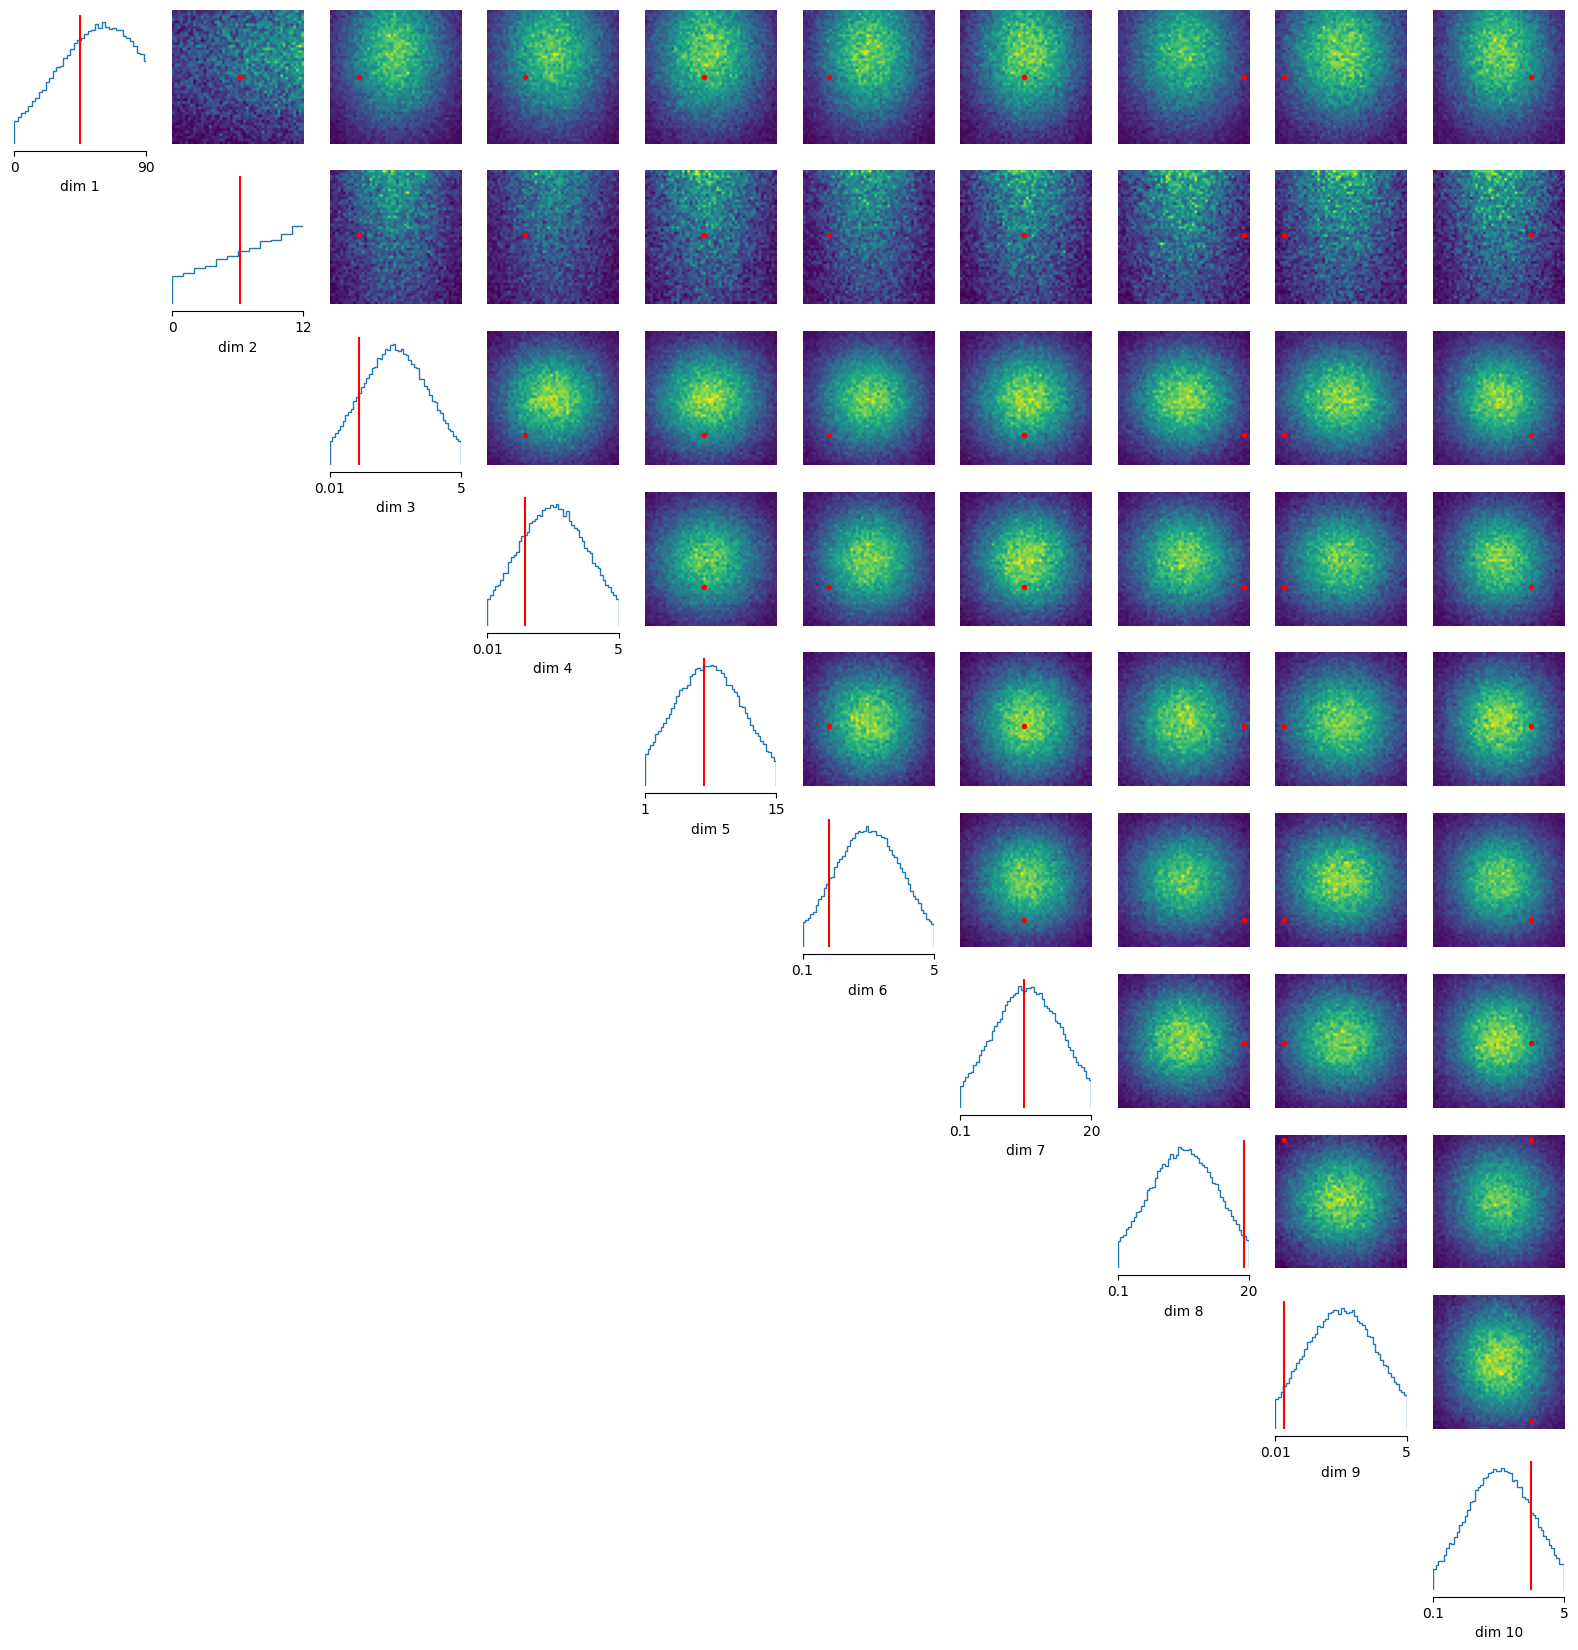

In [ ]:
prior_min = [0, 0, 0, -140, 0, 0, -180, 0, 0, 0, 0, 0, 0, -70, 0, 1,0,0]
prior_max =[70, 24, 0.2, 0, 1, 110, 20, 2.8, .5, 20, 15, 240, 4, 0, 3, 10,1,1]
prior_min = [0, 0, 0.01, 0.01, 1, 0.1, 0.1, 0.1, 0.01, 0.1, 0.01,0.01,0.01,0.01,0.01,0.01]
prior_max =[120, 40, .2, .1, 10, 0.5,10 ,10, 2, 2, 10,0.5,0.5,0.5,2,0.1]

prior_min = [0, 0, 0.01, 0.01, 1, 0.1, 0.1, 0.1, 0.01, 0.1]
prior_max =[90, 12, 5, 5, 15, 5,20 ,20, 5, 5]

limits = list(zip(prior_min, prior_max))
ticks = limits

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    ticks=ticks,
    figsize=(20, 20),
    points = theta_i,
    points_offdiag={"markersize": 6},
    points_colors="r",
);

In [ ]:
print(theta_i)

[44.782024    6.1860323   1.134042    1.4599874   7.2874994   1.0916399
  9.709142   19.17313     0.32202727  3.7453337 ]


In [ ]:
posterior_sample = torch.mean(samples,0)
print(posterior_sample)

tensor([61.3433, 24.5455,  2.4867,  2.4953,  7.8042,  2.5513, 10.2241, 10.0961,
         2.5174,  2.5860])


In [ ]:
calculate_summary_statistics(run_HH_model(true_params))

Initial t size: 6500, dt: 0.1
Array size: 30
Final sum_stats_vec size before slicing (real): 30, n_summary: 30
spike_times_stim: 125
burst: 5
single_spikes: 0
spike times: [ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.7  2.8  3.1  3.2
  3.5  3.6  3.9  4.   4.4  4.5  4.6  4.9  5.   5.4  5.5  5.6  5.7  5.8
  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.9  7.   7.2  7.3  7.4
  7.5  7.6  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3
 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7
 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.1 13.2
 13.3 13.4 13.5 13.6 15.1 15.2 25.7 25.8 40.5 40.6 54.  54.1 54.2]


array([ 1.25000000e+02, -7.31582585e+01,  1.19893548e+02,  2.60248607e+00,
        1.34049118e+01,  1.92307692e-02,  5.00000000e+00,  2.70800000e+01,
        1.88580381e+01,  2.98800000e+01,  1.55149476e+01,  2.80000000e+00,
        5.35014019e+00,  7.69349131e-03,  3.34831538e+01, -8.17604219e+01,
        4.95590688e+01, -1.31386839e+01,  1.04049118e+01,  4.36290323e-01,
        1.98088994e+00,  1.00000000e-01,  6.32564667e+00,  4.54030226e+00,
        0.00000000e+00,  3.90625000e-02,  7.81250000e-02,  1.17187500e-01,
        1.56250000e-01,  1.95312500e-01])

In [ ]:
calculate_summary_statistics(run_HH_model(posterior_sample))


Initial t size: 6500, dt: 0.1
Array size: 14
Final sum_stats_vec size before slicing (real): 14, n_summary: 30
spike_times_stim: [ 142  157  168  183  204  660  777 1268 1328 1391 1419 1451 1533 1575
 1669 1697 1722 1773 1804 1823 1918 1961 2014 2068 2087 2207 2243 2341
 2460 2556 2708 2765 2943 2971 3112 3133 3207]
spikes: 37
burst: 0
single_spikes: 36
time[   0    1    2 ... 6497 6498 6499]


array([ 8.51388889e+01,  1.03421509e+02,  5.35000000e+01,  2.90127089e+00,
        1.21473877e+00,  1.76859459e+03,  8.77546964e+02,  1.80400000e+03,
       -3.48192901e-01,  2.03090584e+01, -1.04684039e+02,  5.19511281e+01,
       -2.03287730e+01,  4.78536407e-01])

In [ ]:
posterior_sample = posterior.sample((1,), x=observation_summary_statistics).numpy()
print(posterior_sample)
print(observation_summary_statistics)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

[[80.626274   2.6873903  0.5390402  3.3666406  6.2067137  1.324438
   6.9254174 10.0068865  1.572147   2.3672442  6.4856195  2.3247643
   2.179953   2.7058847  6.4253917]]
[ 8.60000000e+01 -5.00046269e+01  2.45918055e+02  3.06449846e+00
  1.56543929e+01  1.32307692e-01  1.00000000e+00  3.50000000e+01
  0.00000000e+00  7.30000000e+01  0.00000000e+00  3.80000000e+01
  0.00000000e+00  1.53869826e-04  6.41409626e+01 -7.37963729e+01
  8.92164464e+01 -2.90872425e+01  1.26543929e+01  3.96470588e+01
  1.94807331e+01  3.80000000e+01  3.18730574e+00  4.91353802e-01
  1.16034587e+11]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure that true_params, run_HH_model, calculate_summary_statistics, and posterior are defined
# Define the required length
required_length = 6500

# Simulate the observation trace
sim_observation_trace = run_HH_model(true_params)
observation_data = sim_observation_trace["data"]

# Ensure the observation data has the required length
if len(observation_data) > required_length:
    observation_data = observation_data[:required_length]
else:
    observation_data = np.pad(observation_data, (0, required_length - len(observation_data)), 'constant')

# Calculate summary statistics (if needed)
observation_summary_statistics = calculate_summary_statistics(sim_observation_trace)

# # Sample from the posterior
posterior_sample = posterior.sample((1,), x=observation_summary_statistics).numpy()

# Simulate with posterior sample
x = run_HH_model(posterior_sample)
simulated_data = x["data"]

# Ensure the simulated data has the required length
if len(simulated_data) > required_length:
    simulated_data = simulated_data[:required_length]
else:
    simulated_data = np.pad(simulated_data, (0, required_length - len(simulated_data)), 'constant')

# Generate the time array
t = np.arange(required_length)

# Plot the observation data and the simulated data
fig = plt.figure(figsize=(27, 5))
plt.plot(t, observation_data, lw=2, color='purple', label="observation")
plt.plot(t, simulated_data, "--", lw=0.5, color='lime', label="posterior sample")

# Final plot adjustments
plt.xlabel("time (ms)")
plt.ylabel("voltage (mV)")
plt.title("Random Posterior Sample")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.3, 1), loc="upper right")
plt.show()


Initial t size: 6500, dt: 0.1
Array size: 13
Final sum_stats_vec size before slicing (real): 13, n_summary: 32
spike_times_stim: [   8   73  100  107  133  151  156  162  181  204  207  228  244  265
  282  288  315  320  327  341  343  352  359  377  394  410  438  476
  491  510  516  540  549  552  566  572  584  597  616  634  648  667
  681  689  691  706  727  741  747  755  769  775  781  787  793  805
  811  817  819  830  849  857  882  892  898  914  927  943  955  961
  977  990  993 1003 1005 1015 1027 1033 1045 1061 1073 1079 1087 1101
 1116 1128 1134 1146 1160 1176 1188 1195 1207 1223 1225 1235 1237 1247
 1267 1281 1295 1301 1307 1323 1325 1335 1344 1354 1369 1381 1387 1399
 1405 1421 1439 1445 1451 1463 1469 1482 1494 1507 1519 1525 1537 1552
 1564 1579 1586 1598 1600 1610 1625 1637 1643 1664 1672 1688 1694 1696
 1706 1718 1724 1741 1753 1766 1774 1799 1824 1832 1851 1866 1882 1888
 1894 1910 1925 1931 1937 1940 1950 1962 1977 1988 1995 1998 2008 2020
 2038 2050 2056 206

AssertionError: Observed data shape (torch.Size([1, 13])) must match the shape of simulated data x (torch.Size([1, 6500])).

In [ ]:
calculate_summary_statistics(run_HH_model(posterior_sample))

Initial t size: 6500, dt: 0.1
Array size: 48
Final sum_stats_vec size before slicing (real): 48, n_summary: 48
spike_times_stim: [ 14  26  38  50  64  81  98 116 135 155 176 197 218 241 264 288 311 336
 361 385 411 437 464 491 519 547 576 605 635 665 696 728 760 793 828 871
 908]
spikes: 37
burst: 0
single_spikes: 36
time: [   0    1    2 ... 6497 6498 6499]


array([5.69318357e-03, 2.48333333e+01, 7.07695792e+00, 3.91567568e+02,
       2.67196207e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
calculate_summary_statistics(run_HH_model(true_params))

Initial t size: 6500, dt: 0.1
Array size: 46
Final sum_stats_vec size before slicing (real): 46, n_summary: 46
spike_times_stim: [  40  377 1194 1268 1402 1517 1532 1638 1686 1786 1804 1826 1920 2080
 2454 2560 2562 2685]
spikes: 18
burst: 1
single_spikes: 16
time: [   0    1    2 ... 6497 6498 6499]


array([2.76965687e-03, 1.55588235e+02, 1.92726279e+02, 1.68505556e+03,
       6.80987802e+02, 1.00000000e+00, 2.56000000e+03, 0.00000000e+00,
       2.56200000e+03, 0.00000000e+00, 2.00000000e+00, 0.00000000e+00,
       1.53869826e-04, 1.23869442e+00, 1.68505556e+03, 6.80987802e+02,
       4.27416400e+06, 7.52688800e+06, 1.10779840e+07, 1.47021850e+07,
       1.79811660e+07, 2.13375240e+07, 2.46506160e+07, 2.81250560e+07,
       3.15356340e+07, 3.48385300e+07, 3.82562720e+07, 4.19194470e+07,
       4.64526200e+07, 5.10262380e+07, 5.53299220e+07, 5.94568190e+07,
       5.53299220e+07, 5.10262380e+07, 4.64526200e+07, 4.19194470e+07,
       3.82562720e+07, 3.48385300e+07, 3.15356340e+07, 2.81250560e+07,
       2.46506160e+07, 2.13375240e+07, 1.79811660e+07, 1.47021850e+07,
       1.10779840e+07, 7.52688800e+06])

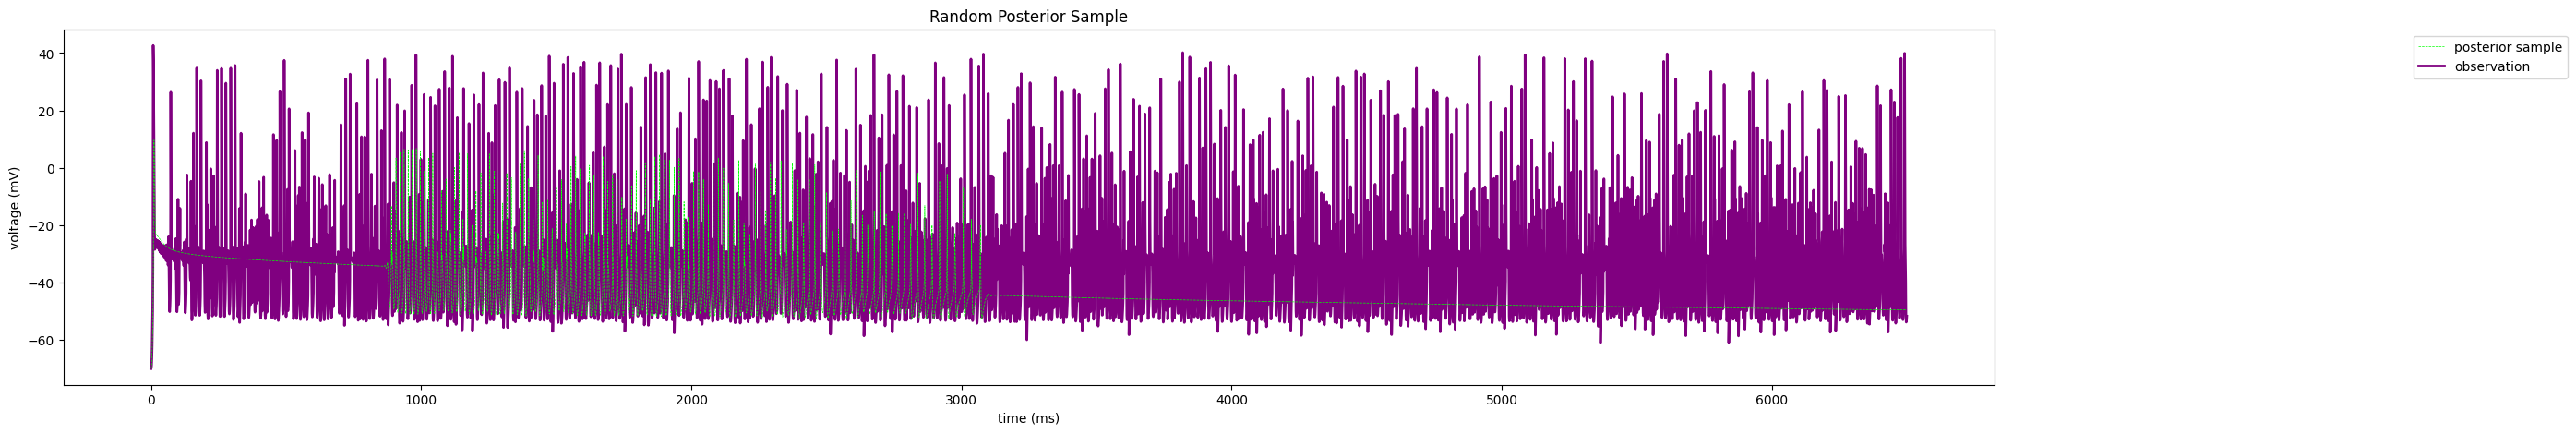

In [ ]:

fig = plt.figure(figsize=(27, 5))

# plot observation
#t = sim_observation_trace["time"]
#t = np.arange(len(Vm_trace1))
t = np.arange(len(sim_observation_trace["data"]))
y_obs = sim_observation_trace["data"]
#y_obs = Vm_trace1
#y_obs = Vm_trace_filtered
plt.plot(t, sample_i, lw=2,color='purple', label="observation")

# simulate and plot samples
t = np.arange(len(norm_lfp))
x = run_HH_model(posterior_sample)
mean_x = np.mean(x["data"])
std_x = np.std(x["data"])
stand_x = (x["data"] - mean_x) / std_x
#plt.plot(t, stand_x, "--", lw=1,color='lime', label="posterior sample")
plt.plot(t, x["data"], "--", lw=.5,color='lime', label="posterior sample")

plt.xlabel("time (ms)")
plt.ylabel("voltage (mV)")
plt.title("Random Posterior Sample")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.3, 1), loc="upper right")
#ax.set_ylim(-2,6)
#ax.set_xlim(3000,5000)

In [ ]:
calculate_summary_statistics(run_HH_model(posterior_sample))

Initial t size: 6500, dt: 0.1


array([1.95555556e+01, 1.16752047e+01, 3.13990000e+04])

In [ ]:

calculate_summary_statistics(run_HH_model(true_params))

Initial t size: 6500, dt: 0.1


array([2.75555556e+01, 6.93245118e+00, 6.61164000e+05])

In [ ]:
print(posterior_sample)

[[56.215668    7.133196    0.23134266  0.07622097  3.371097    0.3348167
   7.8100343   0.6184621   0.5562733   1.7759793  19.870222    3.0475078
   1.3806158   6.6901565   6.0834284 ]]


In [ ]:
print(len(t))

5032


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

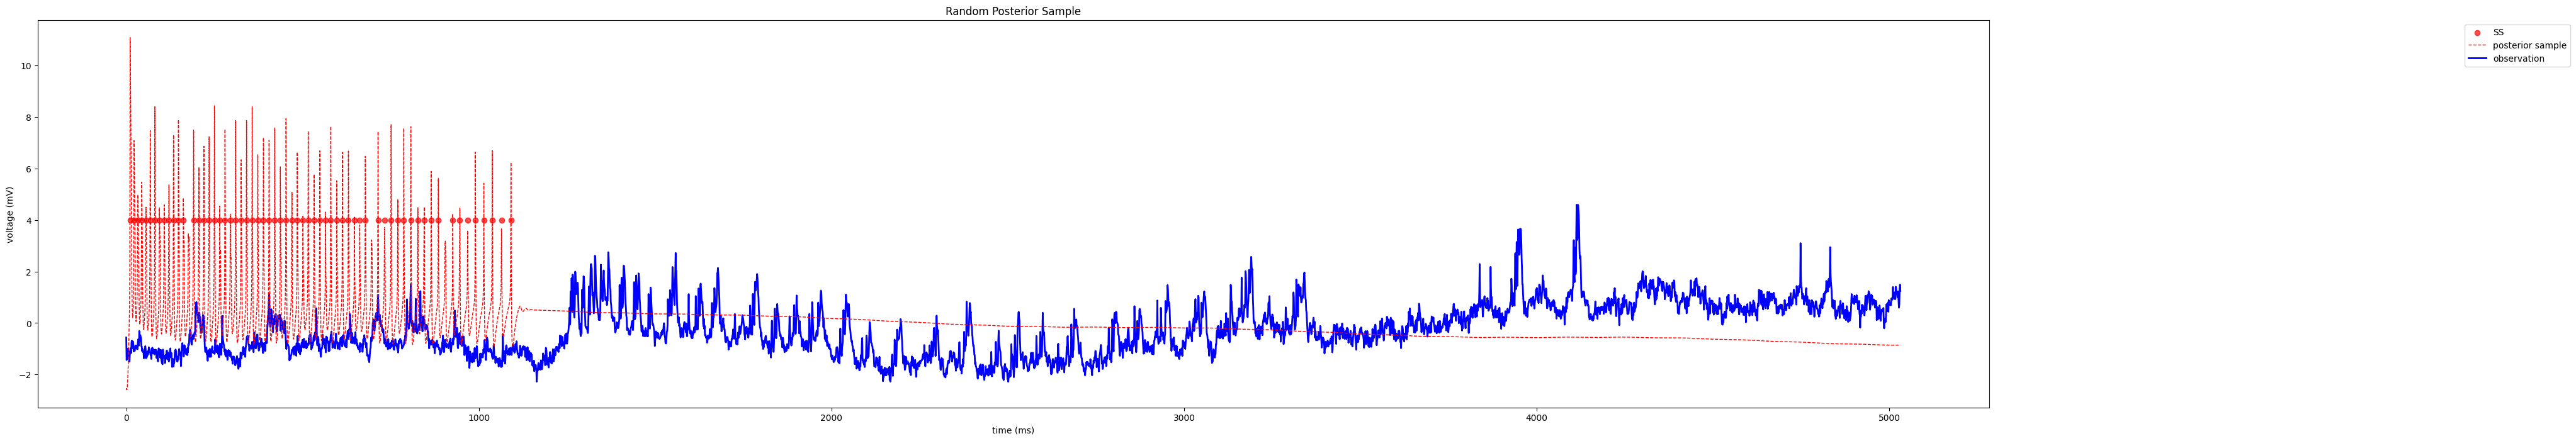

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
posterior_sample = posterior.sample((1,), x=observation_summary_statistics).numpy()
# Define the required length
required_length = 5032

# Generate or define your data arrays
# Assuming these are already defined: observation_summary_statistics, stand_Vm, run_HH_model, posterior_sample

# Generate the time array
t = np.arange(required_length)

# Trim or pad the observation data to the required length
y_obs = stand_Vm[:required_length] if len(stand_Vm) >= required_length else np.pad(stand_Vm, (0, required_length - len(stand_Vm)), 'constant')

# Simulate and process posterior sample
x = run_HH_model(posterior_sample)
simulated_data = x["data"]

# Trim or pad the simulated data to the required length
simulated_data = simulated_data[:required_length] if len(simulated_data) >= required_length else np.pad(simulated_data, (0, required_length - len(simulated_data)), 'constant')

# Standardize the simulated data
mean_x = np.mean(simulated_data)
std_x = np.std(simulated_data)
stand_x = (simulated_data - mean_x) / std_x

# Plot the observation data
fig = plt.figure(figsize=(40, 8))
plt.plot(t, y_obs, lw=2, color='blue', label="observation")

# Plot the simulated data
plt.plot(t, stand_x, "--", lw=1, color='red', label="posterior sample")

# Identify peaks and plot
v = np.array(simulated_data)
peaks, _ = find_peaks(v, height=-20)
spike_times_stim = t[peaks]
plt.scatter(spike_times_stim, np.zeros_like(spike_times_stim) + 4, color='red', label='SS', marker='o', alpha=0.7)

# # Assume spike_indices_list is defined and trim or pad it as needed
# spike_indices_list = spike_indices_list[:required_length] if len(spike_indices_list) >= required_length else np.pad(spike_indices_list, (0, required_length - len(spike_indices_list)), 'constant')
# plt.scatter(spike_indices_list, np.zeros_like(spike_indices_list) + 4, color='blue', label='SS', marker='o', alpha=0.7)

# Final plot adjustments
plt.xlabel("time (ms)")
plt.ylabel("voltage (mV)")
plt.title("Random Posterior Sample")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.3, 1), loc="upper right")
plt.show()


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

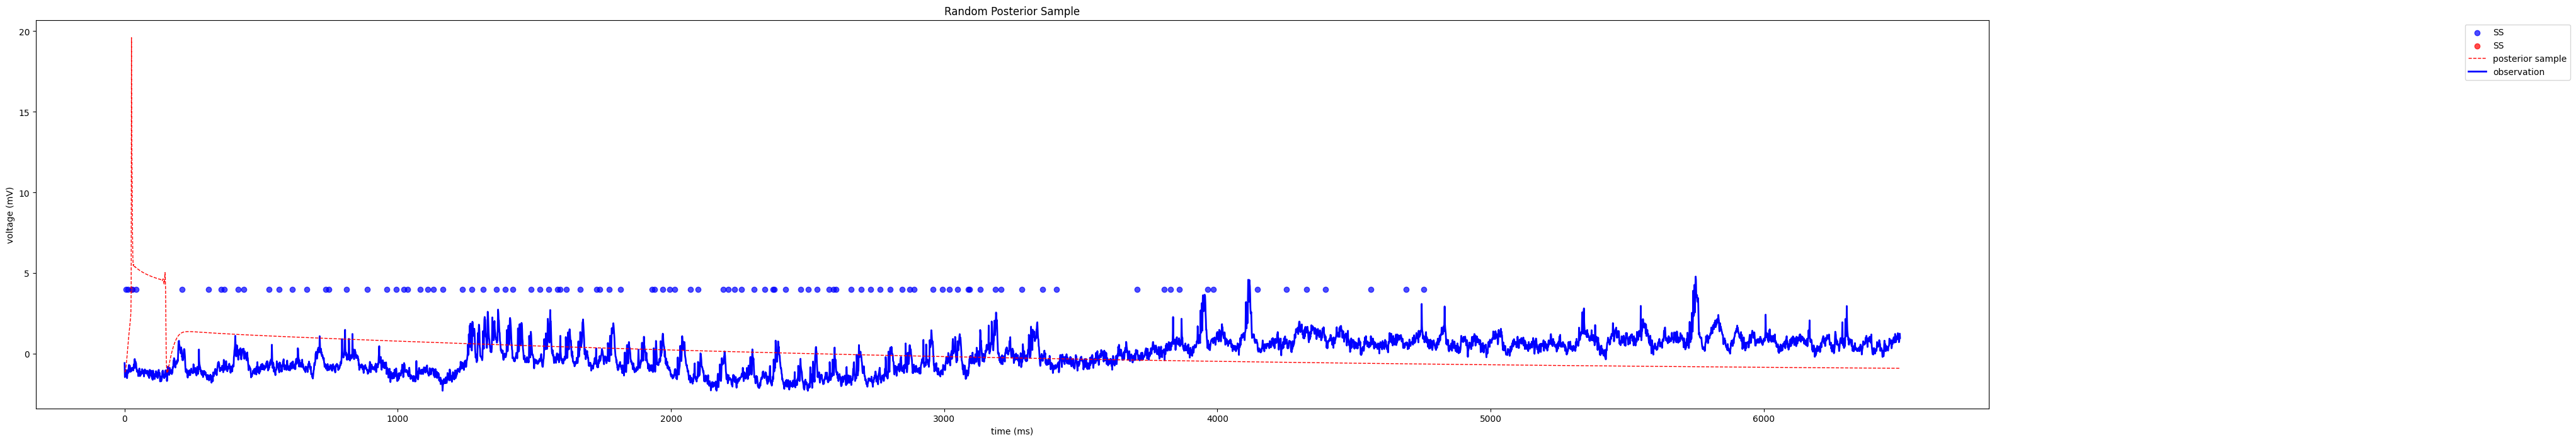

In [ ]:
posterior_sample = posterior.sample((1,), x=observation_summary_statistics).numpy()

fig = plt.figure(figsize=(40, 8))

# plot observation
#t = sim_observation_trace["time"]
t = np.arange(6500)

y_obs = stand_Vm #Vm_trace1
#y_obs = Vm_trace_filtered
plt.plot(t, y_obs, lw=2,color='blue', label="observation")

# simulate and plot samples
#t = np.arange(len(norm_lfp))
x = run_HH_model(posterior_sample)
mean_x = np.mean(x["data"])
std_x = np.std(x["data"])
stand_x = (x["data"] - mean_x) / std_x
plt.plot(t, stand_x, "--", lw=1,color='red', label="posterior sample")
#plt.plot(t, norm_lfp, "--", lw=1,color='pink', label="norm_lfp")
burst_starts_real = np.array([[128, 659, 1262, 1300, 1422, 1460, 1537, 1589, 1673, 1723, 1751, 1810, 1961, 2012, 2082, 2176, 2239, 2384, 2451, 2536, 2590, 2674, 2801, 2853, 2945, 3004, 3094, 3205, 3823, 4958, 5208, 5603, 5833, 6112, 6343, 6483]])
burst_starts_real = burst_starts_real.flatten()
v = np.array(x["data"])
peaks,_ = find_peaks(v, height=-20)
spike_times_stim = t[peaks]
plt.scatter(spike_times_stim, np.zeros_like(spike_times_stim)+4,color='red', label = 'SS', marker = 'o', alpha=0.7)
plt.scatter(spike_indices_list, np.zeros_like(spike_indices_list)+4,color='blue', label = 'SS', marker = 'o', alpha=0.7)
plt.xlabel("time (ms)")
plt.ylabel("voltage (mV)")
plt.title("Random Posterior Sample")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.3, 1), loc="upper right")
# ax.set_ylim(0,4)
#ax.set_xlim(2000,2600)
#ax.set_xticks(range(3700,3800, 10))
#plt.xlim(1000,3000)

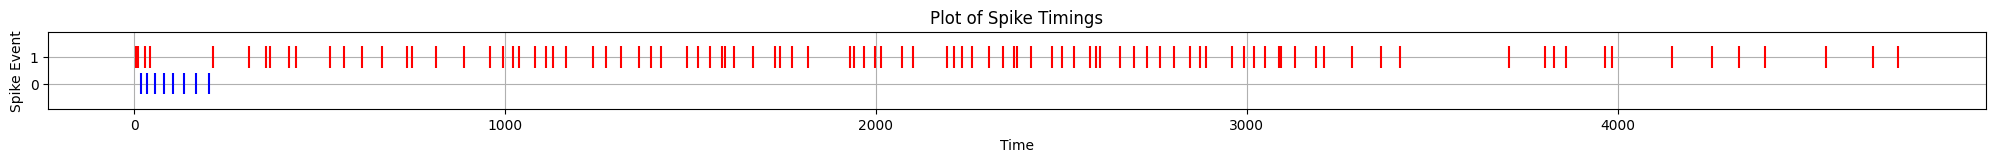

In [ ]:
plt.figure(figsize=(25, 1))
v = np.array(x["data"])
peaks,_ = find_peaks(v, height=-20)
spike_times_stim = t[peaks]
# plt.scatter(spike_times_stim, np.zeros_like(spike_times_stim)+4.,color='blue', label = 'SS', marker = 'o', alpha=0.5)
# plt.scatter(spike_indices_list, np.zeros_like(spike_indices_list)+4,color='red', label = 'SS', marker = 'o', alpha=0.5)
# #plt.xlim(1000,2000)
plt.eventplot([spike_times_stim, spike_indices_list], colors=['blue', 'red'], linelengths=0.8)

# Additional plot customization
plt.xlabel('Time')
plt.ylabel('Spike Event')
plt.title('Plot of Spike Timings')
#plt.xlim(1000,6000)
plt.grid(True)


In [ ]:
print(posterior_sample)
calculate_summary_statistics(run_HH_model(posterior_sample))

[[ 1.8280150e+02  1.0306557e+01  5.1868279e-02  7.2894752e-01
   6.6805041e-01  1.1860374e-01  2.7775478e+00  2.0384259e+00
   3.7630093e+00  2.0716224e+00  6.2988000e+00  3.3569124e-01
  -9.8887741e+01  3.2336319e+01 -8.0804108e+01  2.3810417e+02
  -5.3174000e+01]]
Initial t size: 6500, dt: 0.1
Array size: 48
Final sum_stats_vec size before slicing (real): 48, n_summary: 48
spike_times_stim: [  55   68   71   84   89   95  100  106  111  117  122  128  133  139
  145  150  156  162  168  174  180  186  192  198  205  211  217  224
  230  237  243  250  257  263  270  277  284  291  298  305  312  319
  326  334  341  348  356  363  371  378  386  394  401  409  411  418
  426  434  442  444  451  453  461  470  472  480  489  498  507  516
  526  698  708  716  725  914  995 1000 1011 1013 1022 1096 1099 1107
 1185 1188 1196 1283 1310 1332 1354 1361 1368 1377 1386 1395 1397 1407
 1418 1427 1429 1438 1448 1459 1470 1481 1492 1532 1534 1543 1568 1570
 1579 1627 1629 1637 1648 1659 1671 

array([2.60040006e-02, 1.93690476e+01, 3.24111532e+01, 1.19372189e+03,
       9.19165469e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
posterior_sample = posterior.sample((1,), x=observation_summary_statistics).numpy()
x = run_HH_model(posterior_sample)
y_obs = Vm_trace1
combined_data = np.concatenate((y_obs, x["data"]))
mean_all = np.mean(combined_data)
std_all = np.std(combined_data)
y_obs_stand = (y_obs - mean_all) / std_all
x_data_stand = (x["data"] - mean_all) / std_all
plt.plot(t, y_obs_stand, lw=2, color='black', label="observation")
plt.plot(t, x_data_stand, "--", lw=1, color='lime', label="posterior sample")
# Assuming t should be the same length as the data points
t = np.arange(len(y_obs_stand))
plt.scatter(burst_starts_real, np.zeros_like(burst_starts_real) + 4, color='blue', label='burst_starts_real', marker='o')
plt.xlabel("time (ms)")
plt.ylabel("voltage (mV)")
plt.title("Normalized and Scaled Observations and Simulations")
plt.legend(loc="upper right")
plt.grid(True)




NameError: name 'posterior' is not defined

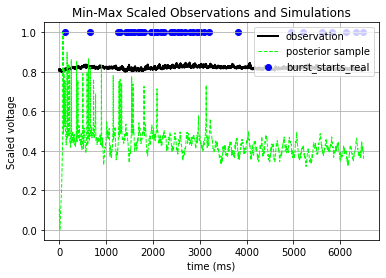

In [ ]:
# Min-Max Scaling
min_all = np.min(combined_data)
max_all = np.max(combined_data)
y_obs_scaled = (y_obs - min_all) / (max_all - min_all)
x_data_scaled = (x["data"] - min_all) / (max_all - min_all)

# Plotting
plt.plot(t, y_obs_scaled, lw=2, color='black', label="observation")
plt.plot(t, x_data_scaled, "--", lw=1, color='lime', label="posterior sample")
t = np.arange(len(y_obs_scaled))
plt.scatter(burst_starts_real, np.zeros_like(burst_starts_real) + 1, color='blue', label='burst_starts_real', marker='o')
plt.xlabel("time (ms)")
plt.ylabel("Scaled voltage")
plt.title("Min-Max Scaled Observations and Simulations")
plt.legend(loc="upper right")
plt.grid(True)


In [ ]:
real_calculate_summary_statistics(Vm_trace1)

Initial t size: 6500, dt: 0.1
Single Spikes: 35, Bursts: 36
[12  6  9 19  5  8 22 13 15  7  6 13 16  9  7  9  7  6  9 13 12 18 17 16
  6  8 13  9 13 25 29 18 12 20 16 11]
[128, 659, 1262, 1300, 1422, 1460, 1537, 1589, 1673, 1723, 1751, 1810, 1961, 2012, 2082, 2176, 2239, 2384, 2451, 2536, 2590, 2674, 2801, 2853, 2945, 3004, 3094, 3205, 3823, 4958, 5208, 5603, 5833, 6112, 6343, 6483]
[140, 665, 1271, 1319, 1427, 1468, 1559, 1602, 1688, 1730, 1757, 1823, 1977, 2021, 2089, 2185, 2246, 2390, 2460, 2549, 2602, 2692, 2818, 2869, 2951, 3012, 3107, 3214, 3836, 4983, 5237, 5621, 5845, 6132, 6359, 6494]
mean burst: 36.0,std burst start: 1637.3538856684527,mean burst end2837.1666666666665,std burst end1639.8407358304307
Array size: 23
Final sum_stats_vec size before slicing (real): 23, n_summary: 24


array([ 1.37000000e+02, -6.61996694e-07,  1.00000000e+00,  1.58567214e+00,
        6.74596024e+00,  2.10769231e-02,  3.60000000e+01,  2.82455556e+03,
        1.63735389e+03,  2.83716667e+03,  1.63984074e+03,  1.26111111e+01,
        5.68271149e+00,  6.43850183e+00, -2.34485626e+00,  2.94104719e+00,
       -2.13353491e+00,  4.69705882e+01,  8.59117999e+01,  1.10000000e+01,
        3.34024589e+00,  2.00000000e+00,  4.22500000e+07])

In [ ]:
calculate_summary_statistics(run_HH_model(posterior_sample))

Initial t size: 6500, dt: 0.1
Single Spikes: 1, Bursts: 1
mean burst: 1.0,std burst start: 0.0,mean burst end0.4,std burst end0.0
Dominant frequency: 0, Total Power: 22680677311.133633
Array size: 23
Final sum_stats_vec size before slicing (real): 23, n_summary: 24
burst_start_times: [0.2]
spike_times_stim: [ 0.2  0.3  0.4 54.1]


array([ 4.00000000e+00, -2.31114596e+01,  2.68119887e+00, -4.72795905e-01,
        4.47813279e+00,  6.15384615e-04,  1.00000000e+00,  2.00000000e-01,
        0.00000000e+00,  4.00000000e-01,  0.00000000e+00,  2.00000000e-01,
        0.00000000e+00, -1.85597622e+01, -3.48447617e+01,  3.15259304e+00,
       -9.51653163e-01,  1.79666667e+01,  2.52672823e+01,  1.00000000e-01,
        7.07106781e-01,  0.00000000e+00,  2.26806773e+10])

In [ ]:
real_calculate_summary_statistics(Vm_trace1)

Initial t size: 6500, dt: 0.1
Single Spikes: 47, Bursts: 28
[ 4 20 22 23 21 21 14 19 15 15 15  7  5  7  7 21 17 14 17  7  7  6  5  4
 13 13 10  4]
[743, 1265, 1350, 1449, 1493, 1568, 1618, 1693, 1756, 1842, 1946, 2025, 2118, 2286, 2382, 2484, 2552, 2665, 2776, 2865, 2986, 3072, 3257, 3991, 4520, 4765, 5149, 5261]
[747, 1285, 1372, 1472, 1514, 1589, 1632, 1712, 1771, 1857, 1961, 2032, 2123, 2293, 2389, 2505, 2569, 2679, 2793, 2872, 2993, 3078, 3262, 3995, 4533, 4778, 5159, 5265]
mean burst: 28.0,std burst start: 1186.2323755169093,mean burst end2579.6428571428573,std burst end1183.529202195273
Array size: 23
Final sum_stats_vec size before slicing (real): 23, n_summary: 24


array([ 1.28000000e+02,  3.10809787e-06,  1.00000000e+00,  1.36640525e+00,
        5.73776913e+00,  1.96923077e-02,  2.80000000e+01,  2.56703571e+03,
        1.18623238e+03,  2.57964286e+03,  1.18352920e+03,  1.26071429e+01,
        6.29250850e+00,  5.98000765e+00, -2.28817463e+00,  2.53852773e+00,
       -2.06056952e+00,  5.08740157e+01,  8.67131203e+01,  1.60000000e+01,
        3.77452486e+00,  1.00000000e+00,  4.22500040e+07])

In [ ]:
plt.plot(positive_fft_result)
plt.xlim(0,100)

NameError: name 'positive_fft_result' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define min-max scaling function
def min_max_scale(data, new_min=0, new_max=1):
    min_val = np.min(data)
    max_val = np.max(data)
    return ((data - min_val) / (max_val - min_val)) * (new_max - new_min) + new_min

# Scale Vm_trace1 and stand_x to the same range
Vm_trace_scaled = min_max_scale(Vm_trace1)
stand_x_scaled = min_max_scale(stand_x)

# Plot the scaled data
plt.figure(figsize=(7, 5))
plt.plot(t, Vm_trace_scaled, lw=2, color='purple', label="observation")
plt.plot(t, stand_x_scaled, "-", lw=1, color='lime', label="posterior sample")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (scaled)")
plt.title("Scaled Vm_trace and Stand_x")
plt.legend()
plt.show()


In [ ]:
real_calculate_summary_statistics(Vm_trace1)

In [ ]:
real_calculate_summary_statistics(y_obs)

In [ ]:
fig = plt.figure(figsize=(7, 5))

# plot observation
t = sim_observation_trace["time"]
#t = np.arange(len(Vm_trace1))
y_obs = sim_observation_trace["data"]
#y_obs = Vm_trace1
#y_obs = Vm_trace_filtered
plt.plot(t, y_obs, lw=2,color='purple', label="observation")

# simulate and plot samples
x = run_HH_model(posterior_sample)
mean_x = np.mean(x["data"])
std_x = np.std(x["data"])
stand_x = (x["data"] - mean_x) / std_x
#plt.plot(t, stand_x, "-", lw=1,color='lime', label="posterior sample")
plt.plot(t, x["data"], "-", lw=1,color='lime', label="posterior sample")

plt.xlabel("time (ms)")
plt.ylabel("voltage (mV)")
plt.title("Random Posterior Sample")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.3, 1), loc="upper right")
# ax.set_ylim(-20,10)
#ax.set_xlim(1000,2000)

NameError: name 'sim_observation_trace' is not defined

<Figure size 700x500 with 0 Axes>

In [ ]:
import numpy as np

# Example definition of the run_HH_model function
def run_HH_model(parameters):
    # This function should run the Hodgkin-Huxley model and return a simulated trace.
    # Replace the following line with the actual implementation.
    return np.sin(np.linspace(0, 10, len(Vm_trace1))) + parameters[0]  # Example implementation

# Function to compute mean squared error
def compute_mse(simulated_trace, real_trace):
    return np.mean((simulated_trace - real_trace) ** 2)

# Generate posterior samples
samples = posterior.sample((100000,), x=observation_summary_statistics)

# Assuming Vm_trace1 is a 1D array representing the real data
Vm_trace1 = np.random.rand(1000)  # Replace with actual Vm_trace1 data

# Initialize an array to store MSE values
mse_values = np.zeros(len(samples))

# Calculate MSE for each sample
for i, sample in enumerate(samples):
    simulated_trace = run_HH_model(sample)
    mse_values[i] = compute_mse(simulated_trace, Vm_trace1)

# Find the index of the sample with the smallest MSE
best_match_index = np.argmin(mse_values)

# Get the best matching sample
best_match_sample = samples[best_match_index]

print("Best match index:", best_match_index)
print("Best match sample:", best_match_sample)
print("MSE of best match sample:", mse_values[best_match_index])

# Optionally, plot the best matching simulated trace against the real data
import matplotlib.pyplot as plt

best_matching_trace = run_HH_model(best_match_sample)

plt.figure(figsize=(12, 6))
plt.plot(Vm_trace1, label='Real Data (Vm_trace1)')
plt.plot(best_matching_trace, label='Best Matching Simulated Trace')
plt.legend()
plt.title('Best Matching Trace Comparison')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.show()


KeyboardInterrupt: 